In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv("loan.csv")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
#checking the shape of data
df.shape

(2469, 111)

In [ ]:
#checking the no of rows
len(df.index)

2469

In [ ]:
# there are 39717 rows and 11 columns
#now checking the no of null values in the dataset
df.isnull().sum()


id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
                              ... 
tax_liens                        1
tot_hi_cred_lim               2469
total_bal_ex_mort             2469
total_bc_limit                2469
total_il_high_credit_limit    2469
Length: 111, dtype: int64

In [ ]:
#checking the percentage of null values for each column
100 *(df.isnull().sum()/len(df.index))

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.040502
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [ ]:
#the columns having 100 % missing values does not contribute to our analysis anyway . Hence we are removing them
missing_proportion = 100 *(df.isnull().sum() / len(df.index))
missing_proportion.head(12)

id                 0.000000
member_id          0.000000
loan_amnt          0.000000
funded_amnt        0.000000
funded_amnt_inv    0.000000
term               0.000000
int_rate           0.000000
installment        0.000000
grade              0.000000
sub_grade          0.000000
emp_title          5.508303
emp_length         2.632645
dtype: float64

In [ ]:

df = df.loc[:, ~(missing_proportion >50)]

In [ ]:
df.shape

(2469, 54)

In [ ]:
#there are many columns which have only one value hence they do not contribute to analysis anyway
#dropping off the columns that have non-unique values
single_valued_columns = df.nunique() == 1
single_valued_columns.head(54)

id                            False
member_id                     False
loan_amnt                     False
funded_amnt                   False
funded_amnt_inv               False
term                          False
int_rate                      False
installment                   False
grade                         False
sub_grade                     False
emp_title                     False
emp_length                    False
home_ownership                False
annual_inc                    False
verification_status           False
issue_d                       False
loan_status                   False
pymnt_plan                     True
url                           False
desc                          False
purpose                       False
title                         False
zip_code                      False
addr_state                    False
dti                           False
delinq_2yrs                   False
earliest_cr_line              False
inq_last_6mths              

In [ ]:
#dropping off those columns and rechecking the shape of dataframe
df = df.loc[:, ~single_valued_columns]
df.shape

(2469, 45)

In [ ]:
#checking the current columns
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [ ]:
#id , member_id , address_state, emp_title, url,
#df.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc"])

df.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state", "desc"], axis=1, inplace=True)

In [ ]:
df.columns


Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'pub_rec_bankruptcies'],
      dtype='object')

In [ ]:
#checking the percentage of null values again
100 *(df.isnull().sum()/len(df.index))

loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_length                 2.632645
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0.000000
total_acc                  0.000000
out_prncp                  0.000000
out_prncp_inv              0.000000
total_pymnt                0.000000
total_pymnt_inv            0

In [ ]:
# we can see pub_rec_bankruptcies , last_payment_d, revol_util and emp_length are columns having null values which are to be treated
# we cannot assume public bankruptcy since it is a critical parameter in sending out the loan
# hence we will drop the columns of public bankruptcies having null value
df = df[~df.pub_rec_bankruptcies.isnull()]


In [ ]:
100 *(df.isnull().sum()/len(df.index))

loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_length                 2.633712
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0.000000
total_acc                  0.000000
out_prncp                  0.000000
out_prncp_inv              0.000000
total_pymnt                0.000000
total_pymnt_inv            0

In [ ]:
#checking the mode of emp_length
df['emp_length'].value_counts()

10+ years    544
3 years      266
2 years      261
< 1 year     249
5 years      246
4 years      207
1 year       187
6 years      143
7 years      121
8 years      100
9 years       79
Name: emp_length, dtype: int64

In [ ]:
df['emp_length'].mode()

0    10+ years
Name: emp_length, dtype: object

In [ ]:
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0])

In [ ]:
100 *(df.isnull().sum()/len(df.index))

loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_length                 0.000000
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0.000000
total_acc                  0.000000
out_prncp                  0.000000
out_prncp_inv              0.000000
total_pymnt                0.000000
total_pymnt_inv            0

#the only null value we are left with is the last_pymnt_d & revol_util
#now listing down the features that correspond to post approval of loan as follows from the remaining datset :

revol_bal
revol_util
recoveries
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt

In [ ]:
columns_to_drop = ['earliest_cr_line','delinq_2yrs','revol_bal', 'recoveries', 'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','revol_util']
df.drop(columns=columns_to_drop, inplace=True)


In [ ]:
100 *(df.isnull().sum()/len(df.index))

loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
dti                     0.0
inq_last_6mths          0.0
open_acc                0.0
pub_rec                 0.0
total_acc               0.0
pub_rec_bankruptcies    0.0
dtype: float64

hence , all null values and post loan approval features gets removed from the dataset.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2468 entries, 0 to 2467
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             2468 non-null   int64  
 1   funded_amnt           2468 non-null   int64  
 2   funded_amnt_inv       2468 non-null   float64
 3   term                  2468 non-null   object 
 4   int_rate              2468 non-null   object 
 5   installment           2468 non-null   float64
 6   grade                 2468 non-null   object 
 7   sub_grade             2468 non-null   object 
 8   emp_length            2468 non-null   object 
 9   home_ownership        2468 non-null   object 
 10  annual_inc            2468 non-null   float64
 11  verification_status   2468 non-null   object 
 12  issue_d               2468 non-null   object 
 13  loan_status           2468 non-null   object 
 14  purpose               2468 non-null   object 
 15  dti                  

We can see that term, int_rate, emp_length , dti  have datatype :object. Hence, we should change them.
:

In [ ]:
df.term.head()

0     36 months
1     60 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

In [ ]:
df['term'] = df['term'].str.replace(r'\D', '', regex=True)
df["term"] = df["term"].astype("int32")
df.term.describe

<bound method NDFrame.describe of 0       36
1       60
2       36
3       36
4       60
        ..
2463    36
2464    60
2465    60
2466    60
2467    36
Name: term, Length: 2468, dtype: int32>

In [ ]:
df['int_rate'] = df['int_rate'].str.rstrip('%')
df["int_rate"] = df["int_rate"].astype("float")
df.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

In [ ]:
df["dti"]=df["dti"].astype("float")


In [ ]:
df.emp_length.value_counts()

10+ years    609
3 years      266
2 years      261
< 1 year     249
5 years      246
4 years      207
1 year       187
6 years      143
7 years      121
8 years      100
9 years       79
Name: emp_length, dtype: int64

In [ ]:
df['emp_length'] = df['emp_length'].str.rstrip('years')
df['emp_length'] = df['emp_length'].str.rstrip('year')

In [ ]:
# Replace values in the "emp_length" column
df['emp_length'] = df['emp_length'].replace({
    '< 1 ': '0',
    '10+ ': '10'
})

df['emp_length'] = df['emp_length'].astype("str")
df.emp_length.value_counts()

10    609
3     266
2     261
0     249
5     246
4     207
1     187
6     143
7     121
8     100
9      79
Name: emp_length, dtype: int64

OUTLIER TREATMENT

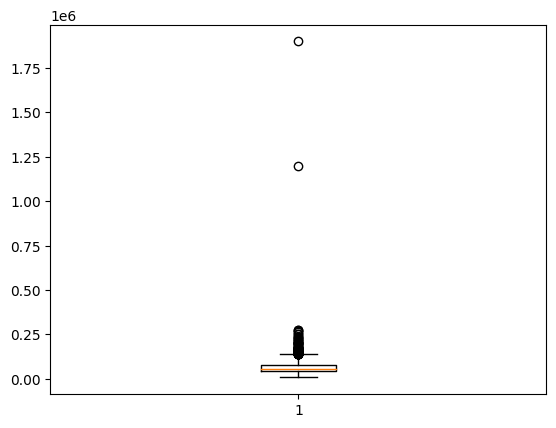

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sea
plt.boxplot(df["annual_inc"])
plt.show()

#Hence , it can be seen from box plot that majority of the annual income data is compressed within a very small range hence we need to do outlier treatment.

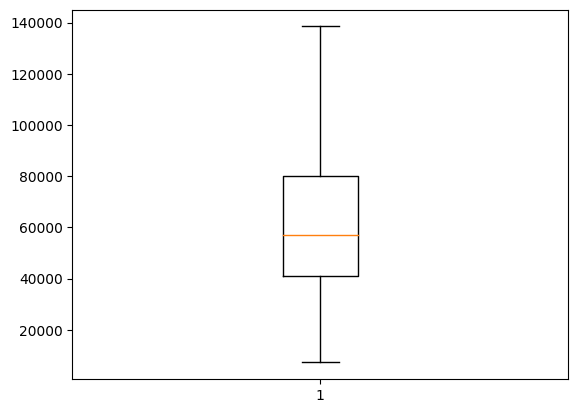

In [ ]:
# Calculate IQR
Q1 = df['annual_inc'].quantile(0.25)
Q3 = df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap high outliers
df.loc[df['annual_inc'] > upper_bound, 'annual_inc'] = upper_bound

# Floor low outliers
df.loc[df['annual_inc'] < lower_bound, 'annual_inc'] = lower_bound

plt.boxplot(df["annual_inc"])
plt.show()





Outlier treatment for 'loan_amnt': Rows dropped: 40 (1.62%)
Outlier treatment for 'funded_amnt': Rows dropped: 17 (0.70%)
Outlier treatment for 'funded_amnt_inv': Rows dropped: 16 (0.66%)
Outlier treatment for 'int_rate': Rows dropped: 5 (0.21%)
Outlier treatment for 'installment': Rows dropped: 58 (2.43%)
Outlier treatment for 'dti': Rows dropped: 0 (0.00%)
Outlier treatment for 'inq_last_6mths': Rows dropped: 178 (7.63%)
Outlier treatment for 'open_acc': Rows dropped: 49 (2.27%)
Outlier treatment for 'total_acc': Rows dropped: 32 (1.52%)


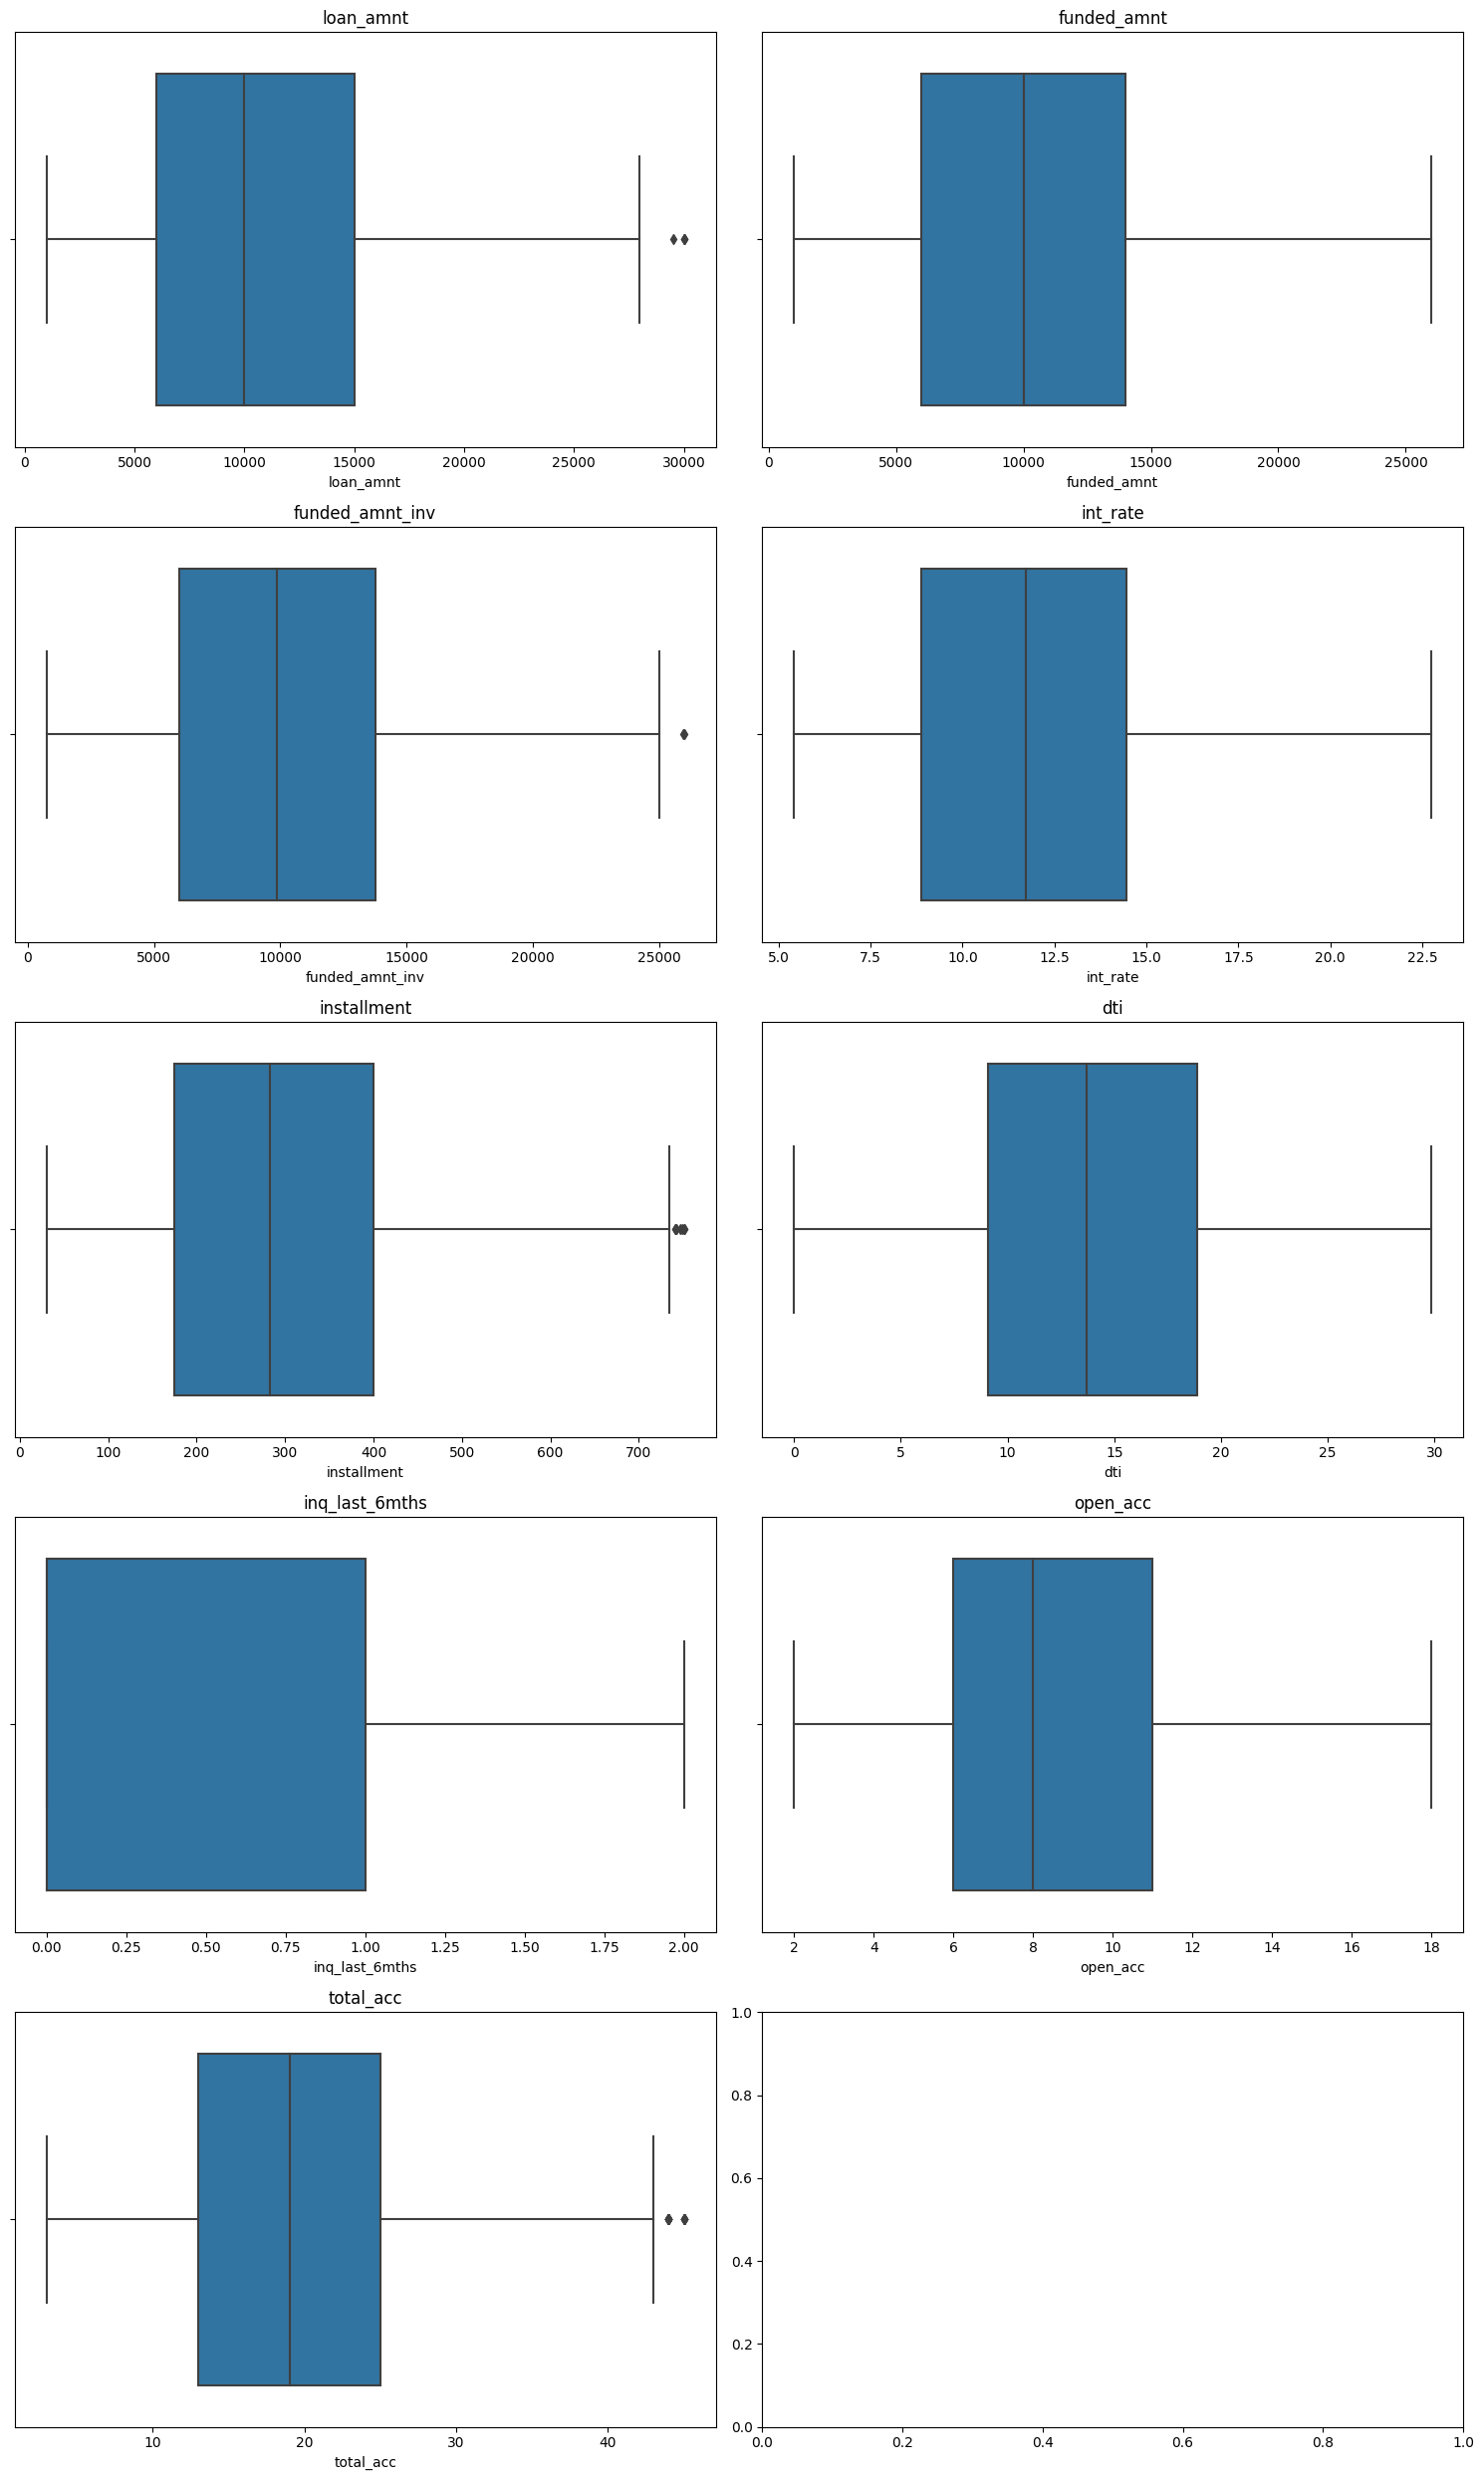

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'df'
# Replace this with loading your actual data

# Function to perform outlier treatment
def outlier_treatment(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    new_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return new_df

# List of columns for outlier treatment
outlier_treatment_columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'dti', 'inq_last_6mths', 'open_acc', 'total_acc']

# Loop through columns and perform outlier treatment
for column in outlier_treatment_columns:
    original_count = len(df)
    df = outlier_treatment(df, column)
    rows_dropped = original_count - len(df)
    percentage_dropped = (rows_dropped / original_count) * 100
    print(f"Outlier treatment for '{column}': Rows dropped: {rows_dropped} ({percentage_dropped:.2f}%)")

# Plot box plots before and after outlier treatment
num_columns = len(outlier_treatment_columns)
num_rows = (num_columns + 1) // 2  # Divide and round up
fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
for i, column in enumerate(outlier_treatment_columns):
    row = i // 2
    col = i % 2
    sns.boxplot(x=df[column], ax=axes[row, col])
    axes[row, col].set_title(column)
plt.tight_layout()
plt.show()


<Axes: xlabel='loan_status', ylabel='count'>

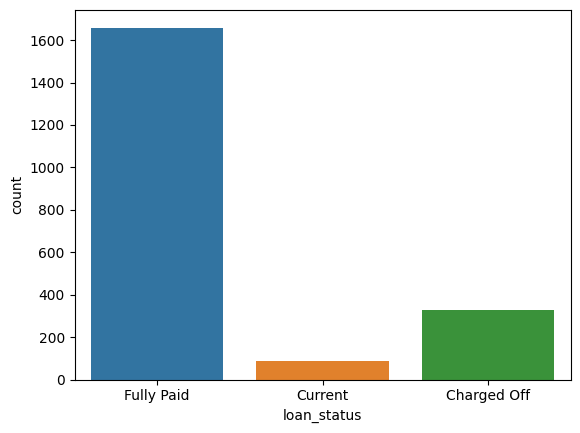

In [ ]:
sns.countplot(x = 'loan_status', data = df)

In [ ]:
df = df[df['loan_status'] != 'Current']

#removed current loans from the dataset since it was not relevant to our analysis

###the percentage of charged off loans is less than paid loans. Rigoruous risk assessment selects borrowers with higher repayment capabilties. Lending institutions implement stricter policies to reduce default risk.

<Axes: xlabel='loan_status', ylabel='count'>

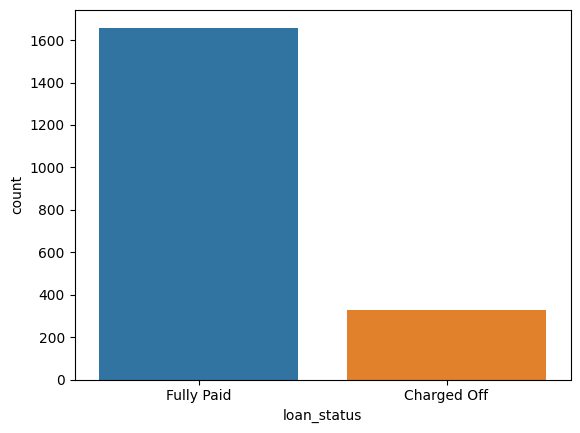

In [ ]:
sns.countplot(x = 'loan_status', data = df)

###Borrowers who have rented accomodation have higher chance of loan default, this can be due to financial constraints associated associated with renting imoacting borrower's ability to repay loan over the specified term.


<Axes: xlabel='home_ownership', ylabel='count'>

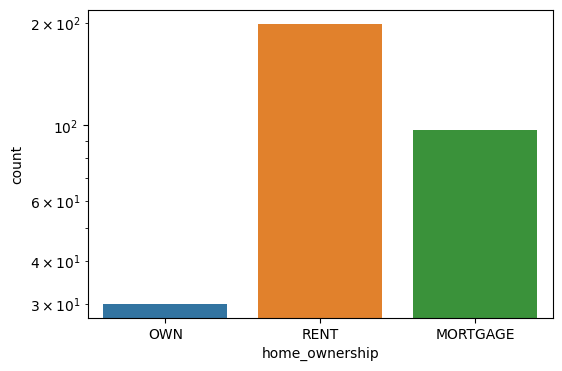

In [ ]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=df[df['loan_status']=='Charged Off'])

<Axes: xlabel='count', ylabel='purpose'>

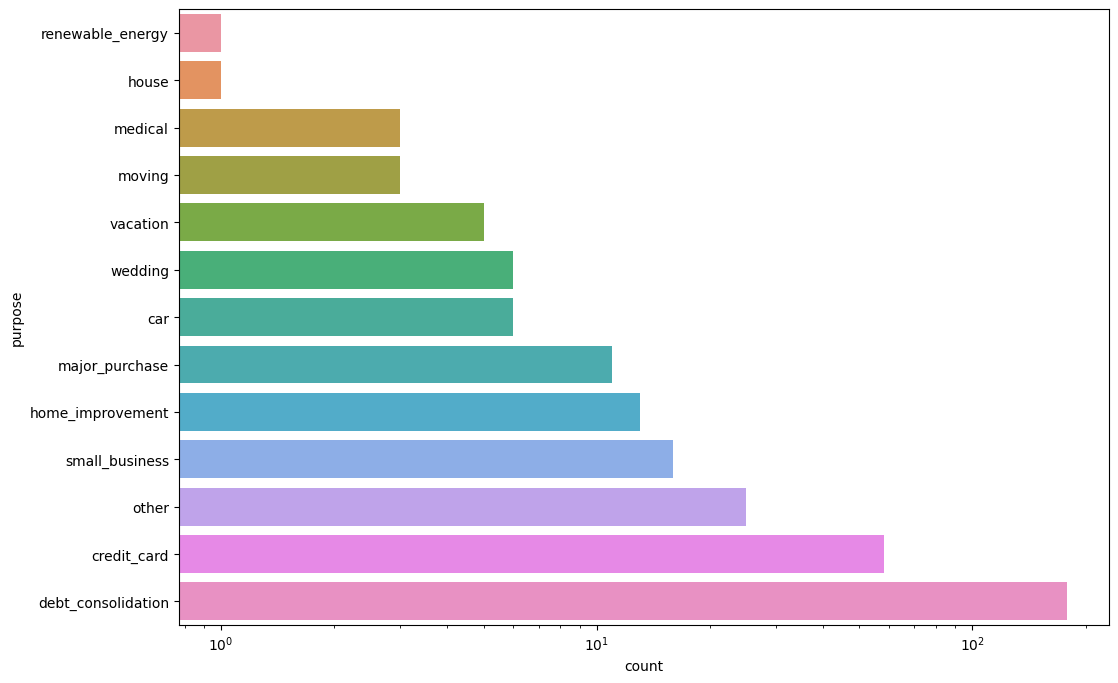

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
purpose_order = df[df.loan_status == 'Charged Off']['purpose'].value_counts().index[::-1]
sns.countplot(y ='purpose', data=df[df.loan_status == 'Charged Off'], order=purpose_order)

<Axes: xlabel='count', ylabel='term'>

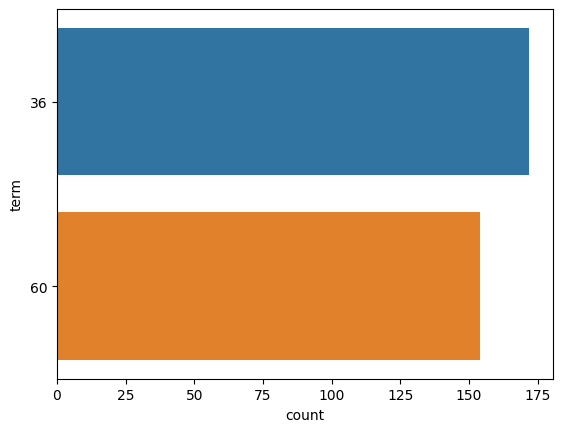

In [ ]:
sns.countplot(y='term', data=df[df['loan_status']=='Charged Off'])

##Borrowers who take loans due to debt consolidation shows the highest number of loan deafult. Also, borrowers taking loans on 60 month loan repayment period shows higher risk of loan defaulting


<Axes: xlabel='verification_status', ylabel='count'>

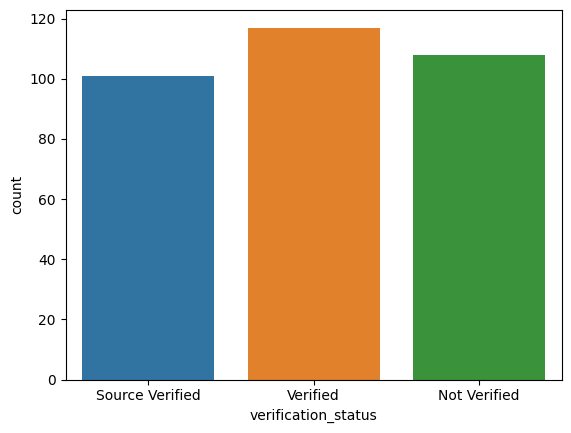

In [ ]:
sns.countplot(x='verification_status', data=df[df['loan_status']=='Charged Off'])

###Borrowers whose income source is not verified shows higher chance of loan deafult. Borrowers with 10 + years employment term also shows higher count of loan default . However , we cannot conclude that higher the length of employment , higher the risk of loan default since number of employees with 10 + years in the dataset is maximum(mode). Hence, percentage would provide a better insight to the data.


<Axes: xlabel='emp_length', ylabel='count'>

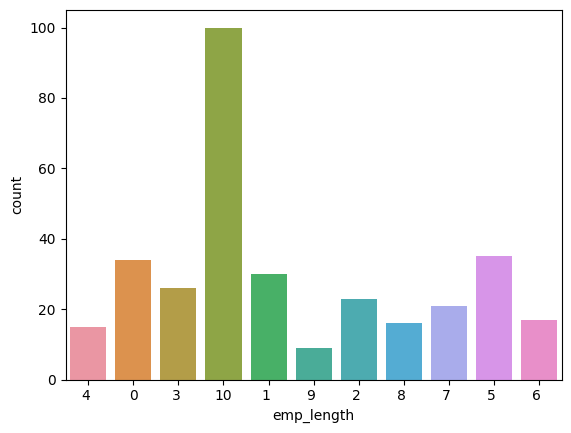

In [ ]:
sns.countplot(x='emp_length', data=df[df.loan_status == 'Charged Off'])

In [ ]:
df['installment_groups'] = pd.cut(df['installment'], bins=10,precision =0,labels=['14-91','91-166','166-241','241-316','316-391','391-466','466-541','541-616','616-691','691-766'])


#SEGMENTED UNIVARIATE ANALYSIS FOR INSTALLMENT AMOUNT VARIABLE



In [ ]:
df.installment.describe()

count    1985.000000
mean      296.889733
std       154.732933
min        30.330000
25%       172.010000
50%       281.620000
75%       396.920000
max       750.970000
Name: installment, dtype: float64

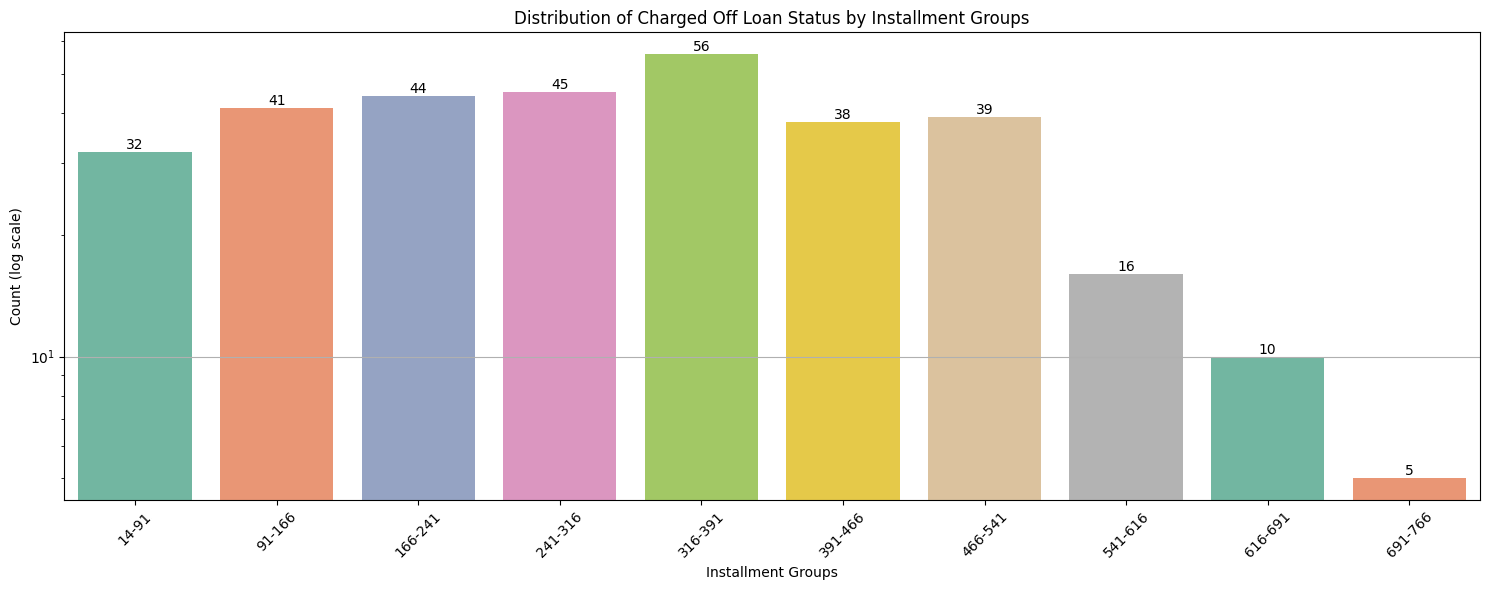

In [ ]:
df['installment_groups'] = pd.cut(df['installment'], bins=10,precision =0,labels=['14-91','91-166','166-241','241-316','316-391','391-466','466-541','541-616','616-691','691-766'])
# Define a color palette with enough colors for each bar
color_palette = sns.color_palette("Set2", n_colors=len(df['installment_groups'].unique()))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 6))
ax.set_yscale('log')

# Create the countplot with the specified color palette
sns.countplot(x='installment_groups', data=df[df['loan_status']=='Charged Off'], palette=color_palette)

# Set title and labels
ax.set_title('Distribution of Charged Off Loan Status by Installment Groups')
ax.set_xlabel('Installment Groups')
ax.set_ylabel('Count (log scale)')

# Add horizontal grid lines
ax.yaxis.grid(True)

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Add value annotations on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{int(p.get_height()):,}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()







#Borrowers having monthly installment in range of 316-391 shows maximum chance of loan defaulting.


# SEGMENTED UNIVARIATE ANALYSIS FOR THE VARIABLE DTI

In [ ]:
df.dti.describe()

count    1985.000000
mean       13.841113
std         6.308116
min         0.000000
25%         9.050000
50%        13.660000
75%        18.860000
max        29.850000
Name: dti, dtype: float64

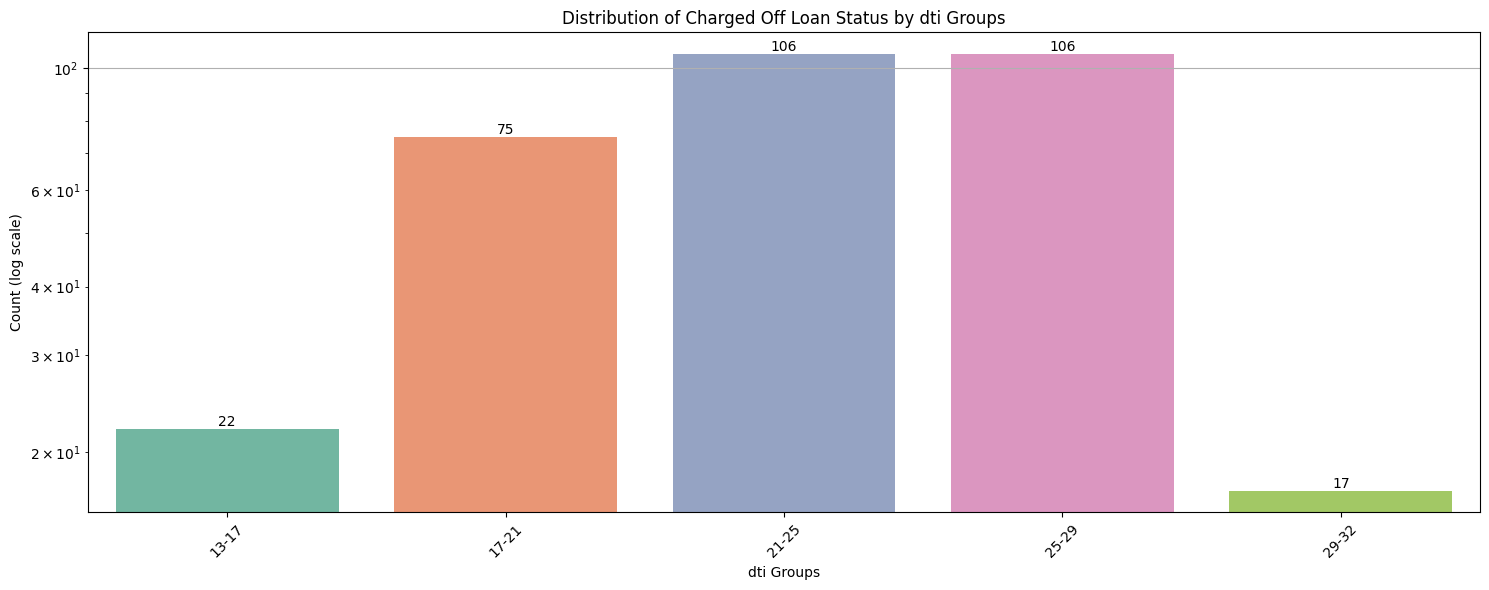

In [ ]:
df["dti_groups"] =pd.cut(df["dti"], bins =5 , precision = 0 , labels =['13-17','17-21','21-25','25-29', '29-32'])
# Define a color palette with enough colors for each bar
color_palette = sns.color_palette("Set2", n_colors=len(df['dti_groups'].unique()))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 6))
ax.set_yscale('log')

# Create the countplot with the specified color palette
sns.countplot(x='dti_groups', data=df[df['loan_status']=='Charged Off'], palette=color_palette)

# Set title and labels
ax.set_title('Distribution of Charged Off Loan Status by dti Groups')
ax.set_xlabel('dti Groups')
ax.set_ylabel('Count (log scale)')

# Add horizontal grid lines
ax.yaxis.grid(True)

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Add value annotations on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{int(p.get_height()):,}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

##Borrowers having Debt to income ratio in the range of 21-29 shows maximum count of loan defaulting.


#SEGMENTED UNIVARIATE ANALYSIS FOR THE VARIABLE LOAN AMOUNT

In [ ]:
df.loan_amnt.describe()

count     1985.000000
mean     11027.065491
std       6109.357970
min       1000.000000
25%       6000.000000
50%      10000.000000
75%      15000.000000
max      30000.000000
Name: loan_amnt, dtype: float64

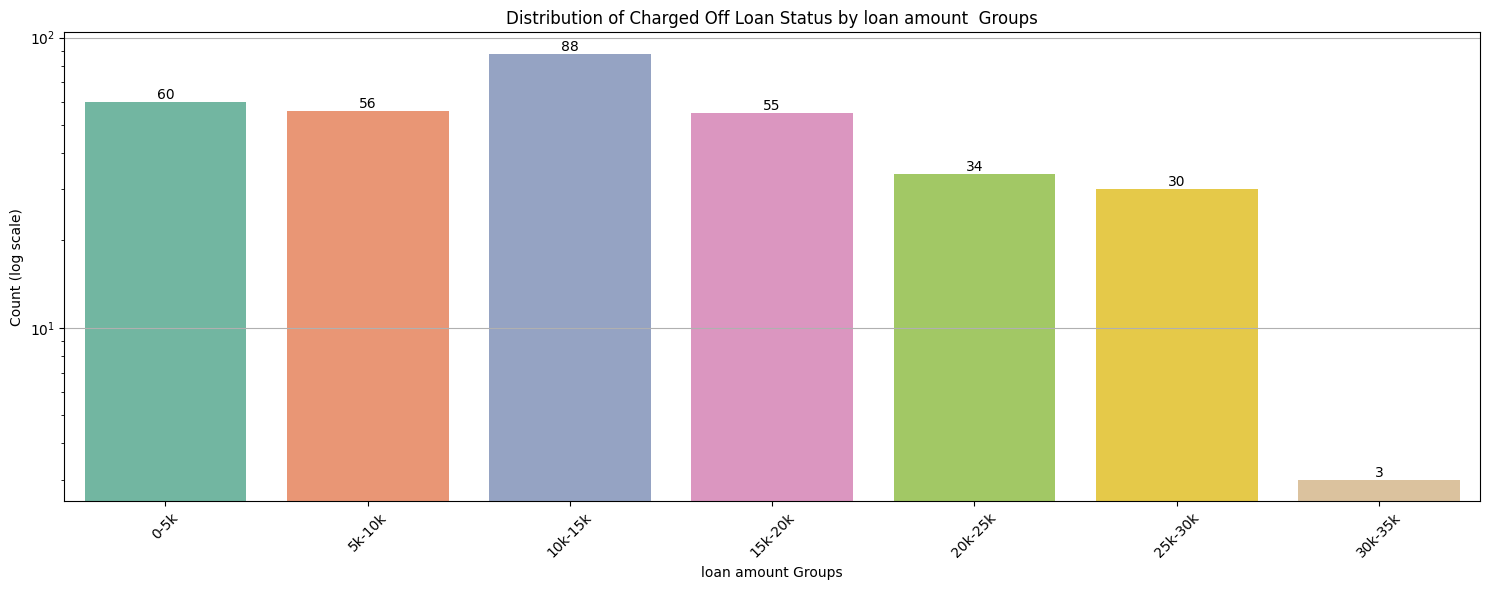

In [ ]:
df['loan_amnt_groups'] = pd.cut(df['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
# Define a color palette with enough colors for each bar
color_palette = sns.color_palette("Set2", n_colors=len(df['loan_amnt_groups'].unique()))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 6))
ax.set_yscale('log')

# Create the countplot with the specified color palette
sns.countplot(x='loan_amnt_groups', data=df[df['loan_status']=='Charged Off'], palette=color_palette)

# Set title and labels
ax.set_title('Distribution of Charged Off Loan Status by loan amount  Groups')
ax.set_xlabel('loan amount Groups')
ax.set_ylabel('Count (log scale)')

# Add horizontal grid lines
ax.yaxis.grid(True)

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Add value annotations on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{int(p.get_height()):,}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

##Borrowers taking loan in range of 10-15K shows greatest count of loann defaulting.

#SEGMENTED UNIVARIATE ANALYSIS FOR THE VARIABLE FUNDED AMOUNT

In [ ]:
df.funded_amnt.describe()

count     1985.000000
mean     10121.536524
std       5362.067411
min       1000.000000
25%       6000.000000
50%      10000.000000
75%      13700.000000
max      26000.000000
Name: funded_amnt, dtype: float64

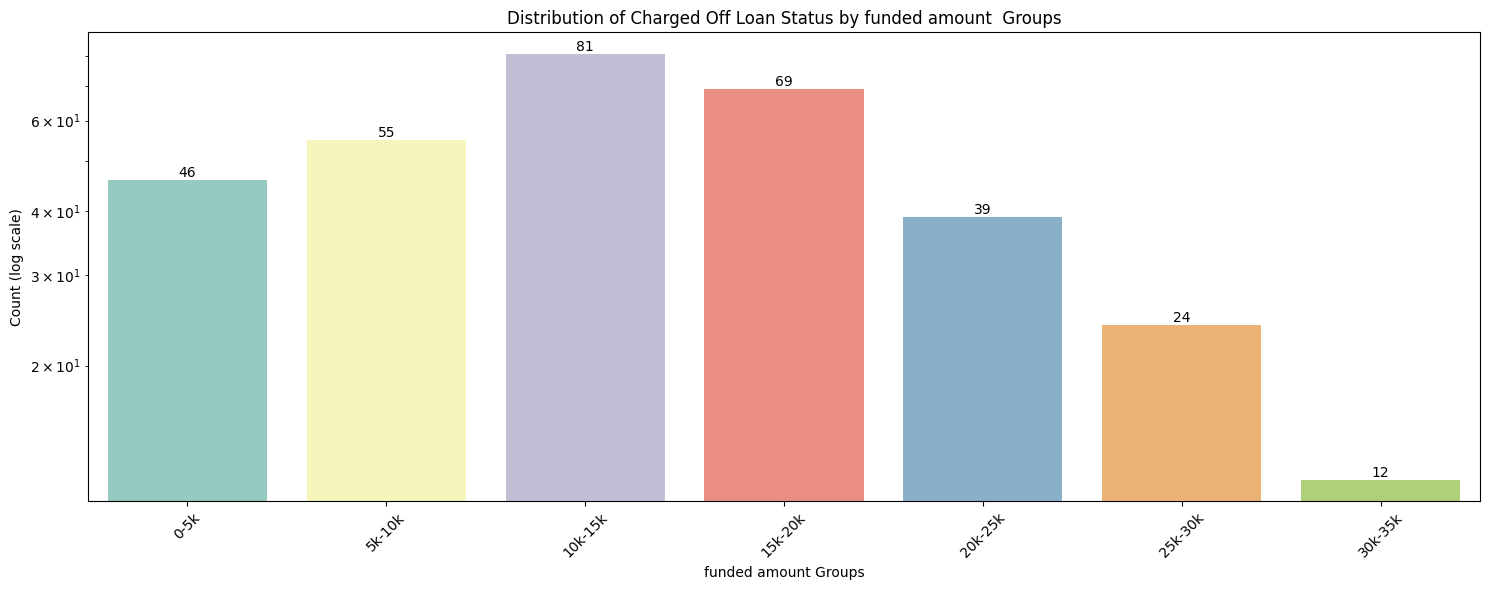

In [ ]:
df['funded_amnt_inv_group'] = pd.cut(df['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
# Define a color palette with enough colors for each bar
color_palette = sns.color_palette("Set3", n_colors=len(df['funded_amnt_inv_group'].unique()))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 6))
ax.set_yscale('log')

# Create the countplot with the specified color palette
sns.countplot(x='funded_amnt_inv_group', data=df[df['loan_status']=='Charged Off'], palette=color_palette)

# Set title and labels
ax.set_title('Distribution of Charged Off Loan Status by funded amount  Groups')
ax.set_xlabel('funded amount Groups')
ax.set_ylabel('Count (log scale)')

# Add horizontal grid lines
ax.yaxis.grid(True)

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Add value annotations on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{int(p.get_height()):,}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

##Borrowers having funded amount in range of 10-15K shows greatest count of loann defaulting.

#SEGMENTED UNIVARIATE ANALYSIS FOR THE VARIABLE INCOME


In [ ]:
df.annual_inc.describe()

count      1985.000000
mean      59898.155914
std       28045.797427
min        7200.000000
25%       40000.000000
50%       54000.000000
75%       75000.000000
max      138500.000000
Name: annual_inc, dtype: float64

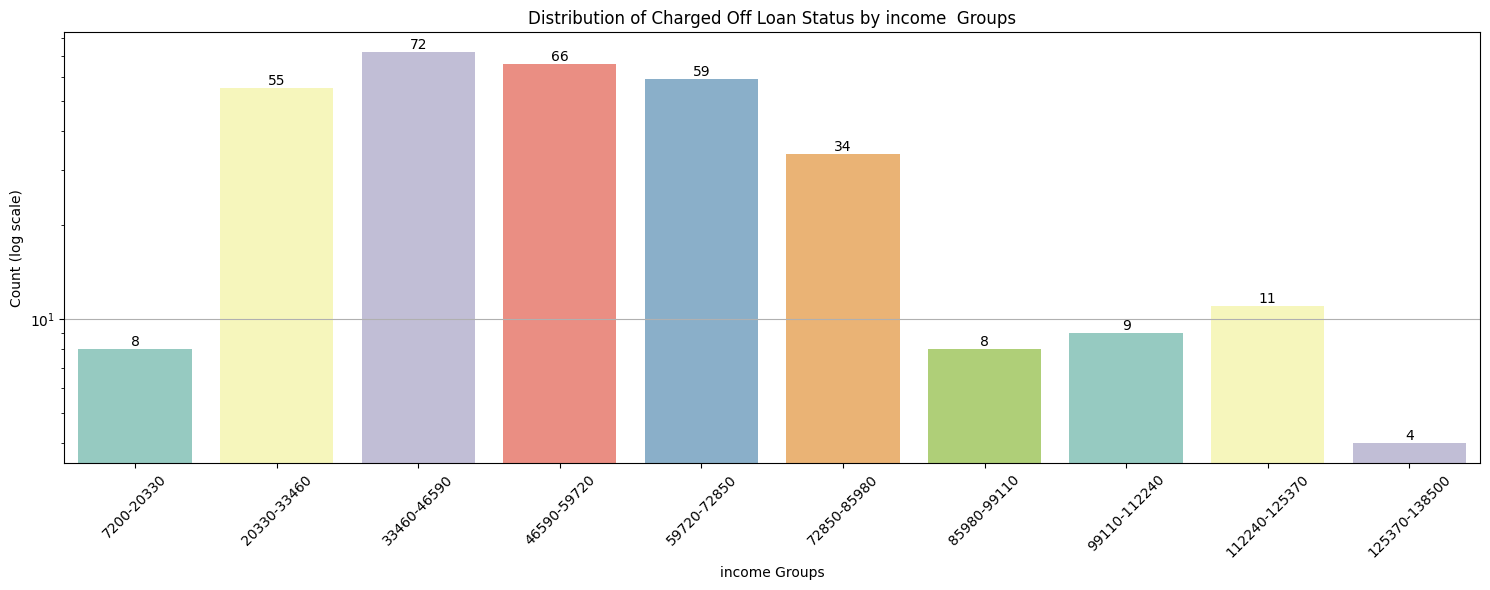

In [ ]:
min_income = df.annual_inc.min()
max_income = df.annual_inc.max()

# Number of bins
num_bins = 10

# Create bins using numpy
bins = np.linspace(min_income, max_income, num_bins + 1)

# Labels for the bins
labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(num_bins)]

# Assign bins to data points
income_bins = pd.cut(df['annual_inc'], bins=bins, labels=labels)
df['income_bins'] = income_bins
ig, ax = plt.subplots(figsize=(15, 6))
ax.set_yscale('log')

# Create the countplot with the specified color palette
sns.countplot(x='income_bins', data=df[df['loan_status']=='Charged Off'], palette=color_palette)

# Set title and labels
ax.set_title('Distribution of Charged Off Loan Status by income  Groups')
ax.set_xlabel('income Groups')
ax.set_ylabel('Count (log scale)')

# Add horizontal grid lines
ax.yaxis.grid(True)

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Add value annotations on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{int(p.get_height()):,}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

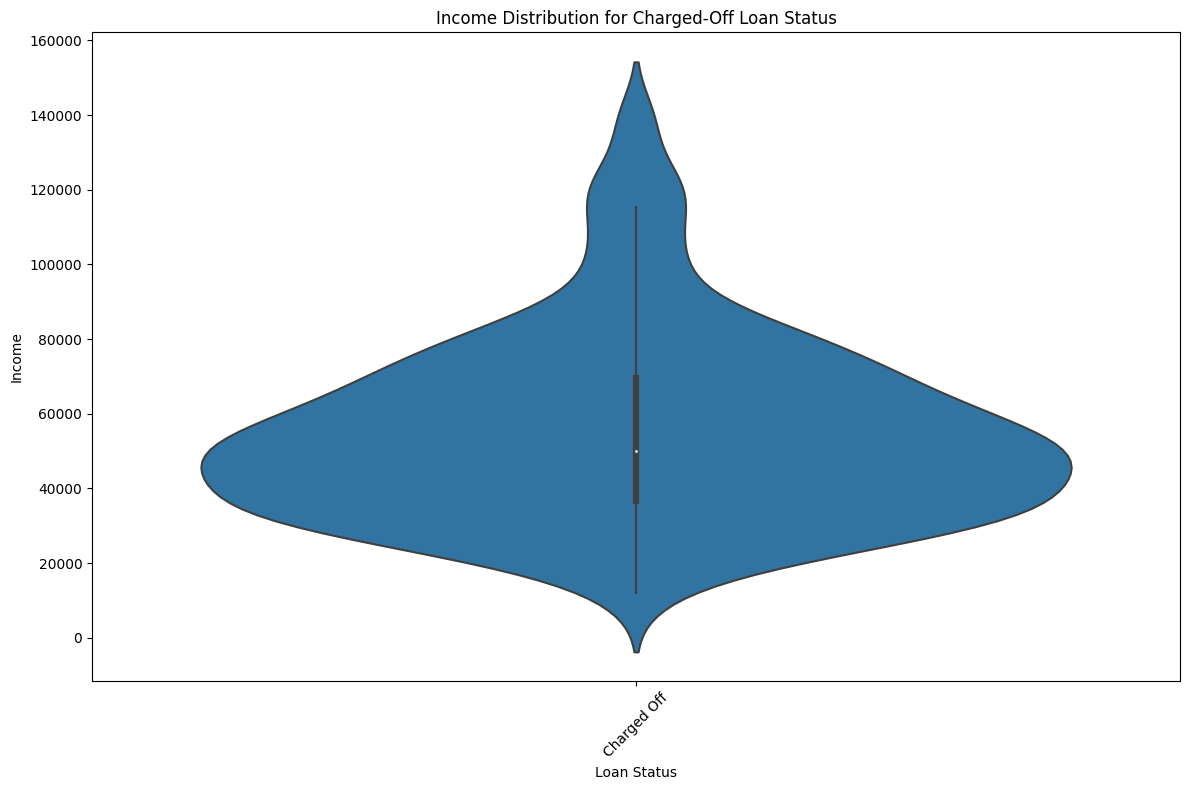

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='loan_status', y='annual_inc', data=df[df['loan_status']=='Charged Off'])
plt.title("Income Distribution for Charged-Off Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Income")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

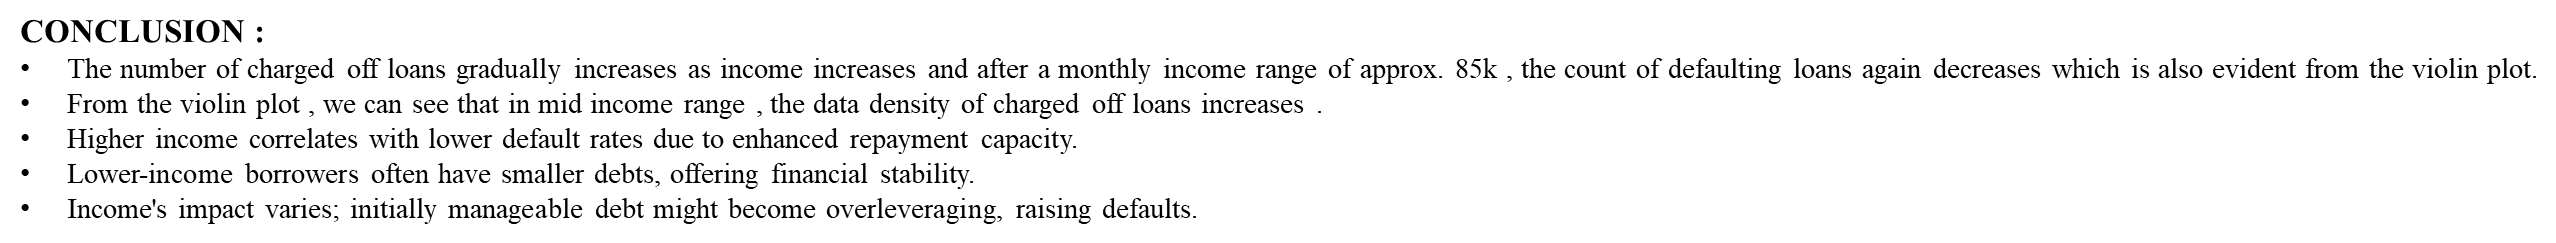

#SEGMENTED UNIVARIATE ANALYSIS FOR THE VARIABLE INTEREST RATE

In [ ]:
df.int_rate.describe()
df.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,326.0,13.654172,3.831841,5.79,10.65,13.49,16.77,22.74
Fully Paid,1659.0,11.130193,3.753883,5.42,7.90,10.65,13.49,22.35


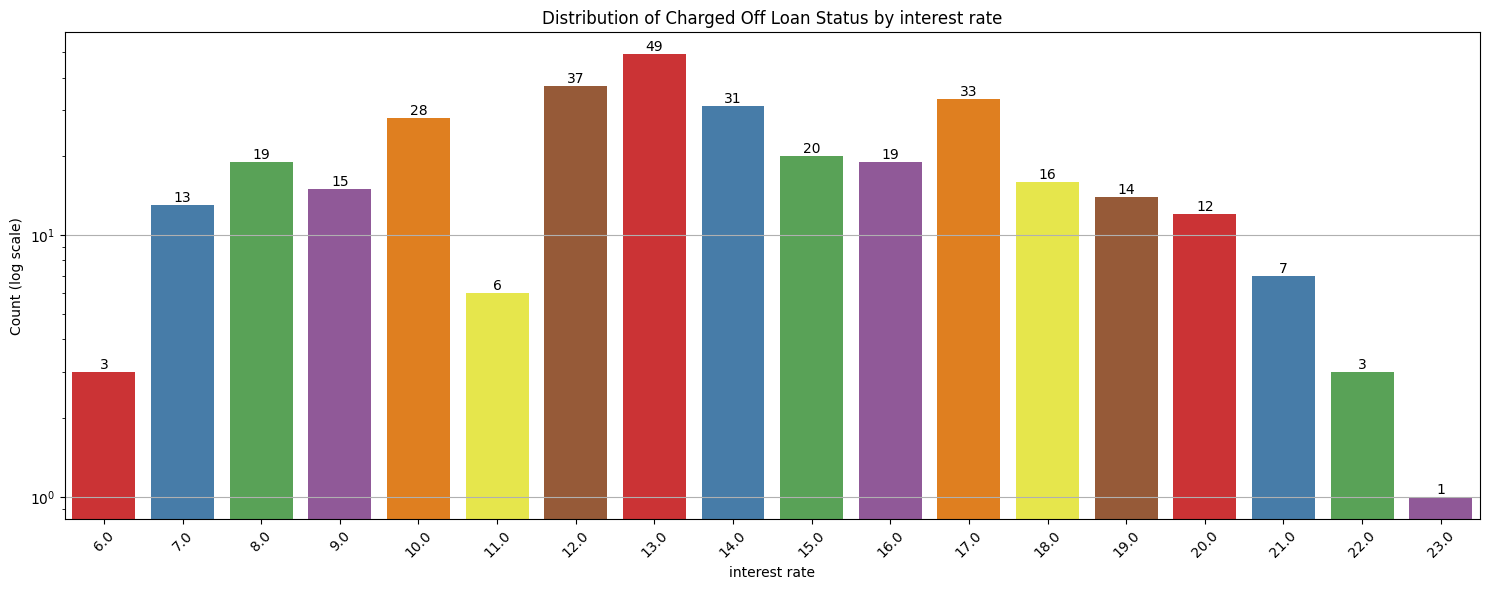

In [ ]:
df['int_rate'] = round(df['int_rate'])
color_palette = sns.color_palette("Set1", n_colors=len(df['funded_amnt_inv_group'].unique()))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 6))
ax.set_yscale('log')

# Create the countplot with the specified color palette
sns.countplot(x='int_rate', data=df[df['loan_status']=='Charged Off'], palette=color_palette)

# Set title and labels
ax.set_title('Distribution of Charged Off Loan Status by interest rate')
ax.set_xlabel('interest rate')
ax.set_ylabel('Count (log scale)')

# Add horizontal grid lines
ax.yaxis.grid(True)

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Add value annotations on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{int(p.get_height()):,}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

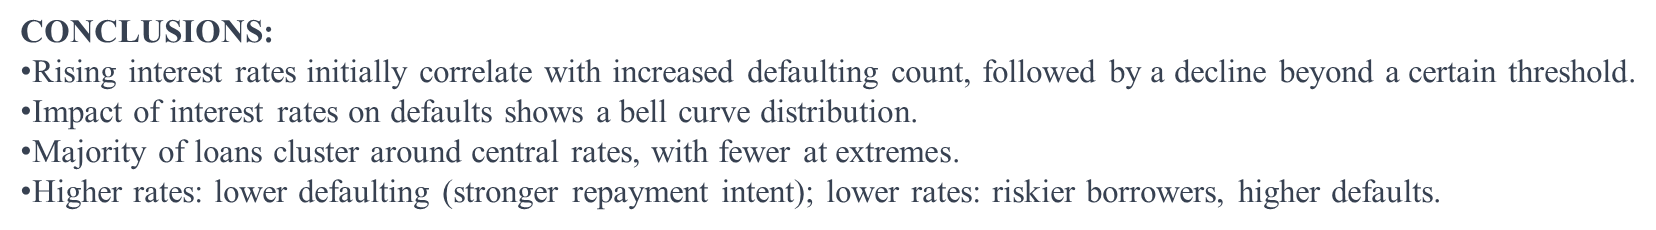

#UNIVARIATE ANALYSIS FOR THE VARIABLE ISSUE DATE

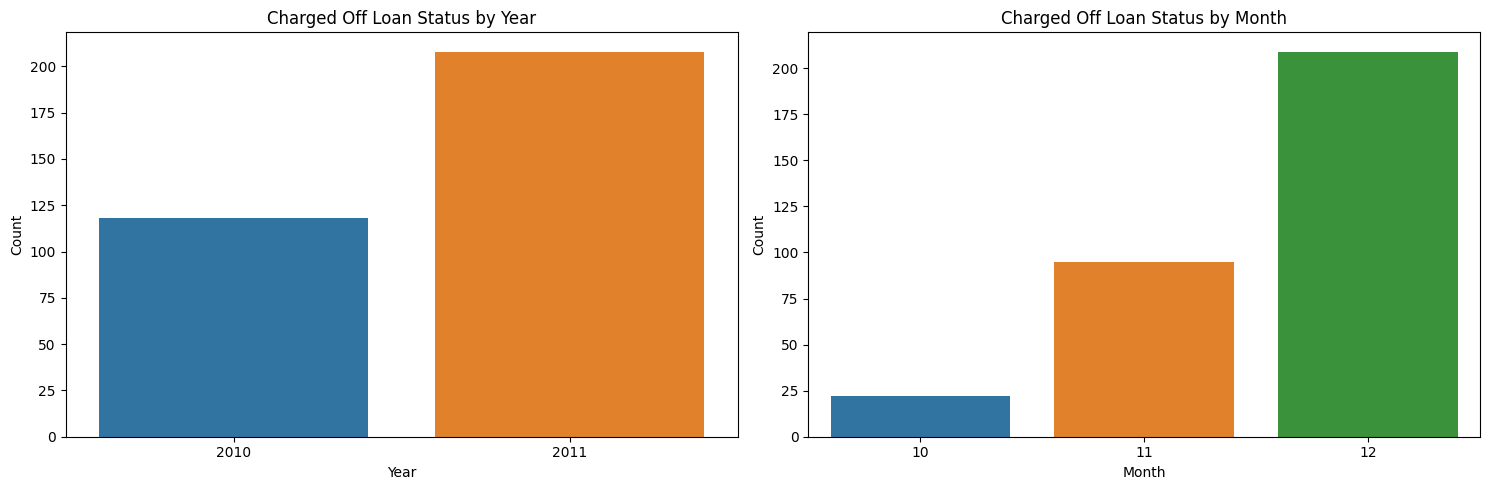

In [ ]:
df['monthyear_column'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df["year"] = pd.DatetimeIndex(df["monthyear_column"]).year
df["month"] = pd.DatetimeIndex(df["monthyear_column"]).month
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Count plot for year
sns.countplot(x='year', data=df[df.loan_status == 'Charged Off'], ax=axes[0])
axes[0].set_title('Charged Off Loan Status by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Count')

# Count plot for month
sns.countplot(x='month', data=df[df.loan_status == 'Charged Off'], ax=axes[1])
axes[1].set_title('Charged Off Loan Status by Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

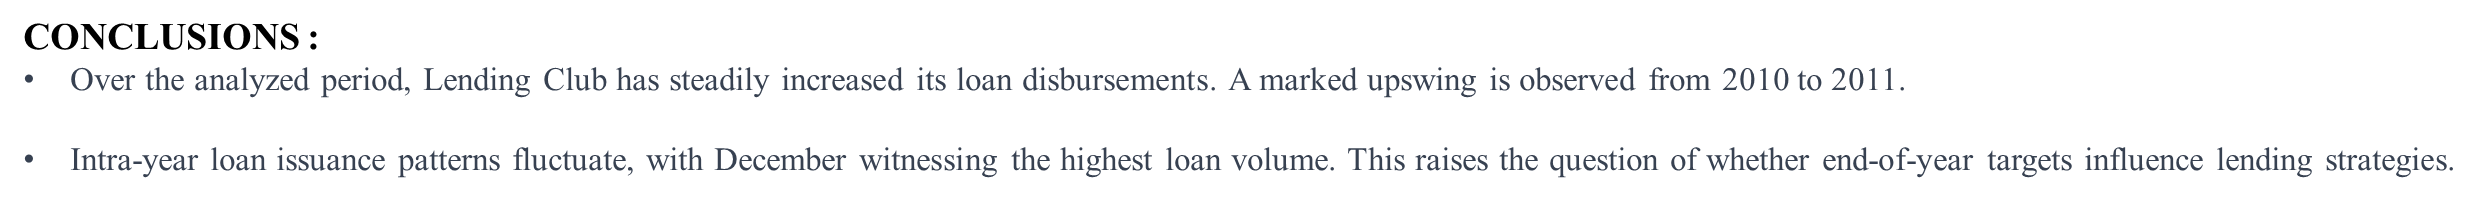

In [ ]:
df.grade.value_counts()


B    666
A    546
C    386
D    230
E     98
F     44
G     15
Name: grade, dtype: int64

In [ ]:
df.sub_grade.value_counts().head()

B4    150
B5    149
A5    148
A4    144
B3    142
Name: sub_grade, dtype: int64

Percentage of Loan Status in Each Sub-Grade:


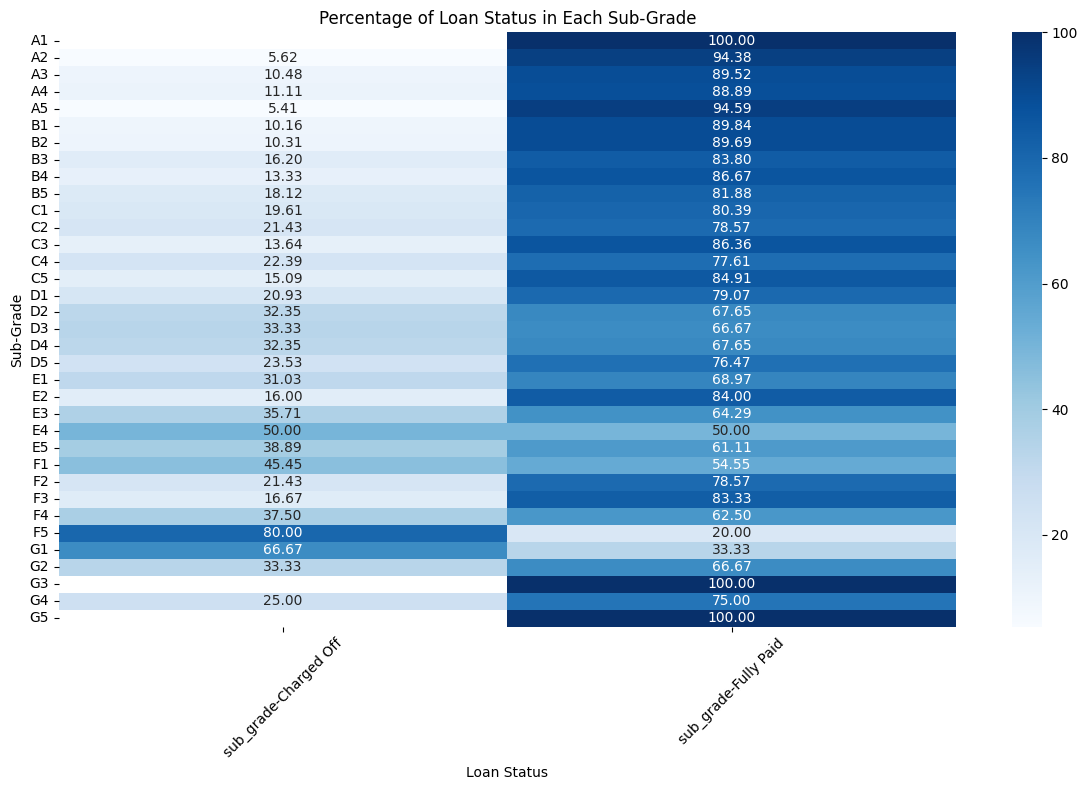

In [ ]:
# Seeing the effect of Loan Sub-grade on Loan Repayment Status

sub_grade_count = df.pivot_table(index='sub_grade', values='loan_status', aggfunc={'sub_grade': 'count'})
loan_status_grade_count = df.pivot_table(index=['sub_grade', 'loan_status'], aggfunc={'sub_grade': 'count'})
loan_status_grade_pcnt = round(loan_status_grade_count * 100 / sub_grade_count, 2)

# Step 2: Unstack the pivot table and style the output
styled_output = loan_status_grade_pcnt.unstack().style.background_gradient(cmap='Blues').format('{0:,.2f}%')

# Step 3: Display the styled output
print("Percentage of Loan Status in Each Sub-Grade:")
display(styled_output)

# Step 4: Visualization - Create a heatmap plot
plt.figure(figsize=(12, 8))
sns.heatmap(loan_status_grade_pcnt.unstack(), annot=True, fmt=".2f", cmap="Blues")
plt.title("Percentage of Loan Status in Each Sub-Grade")
plt.xlabel("Loan Status")
plt.ylabel("Sub-Grade")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

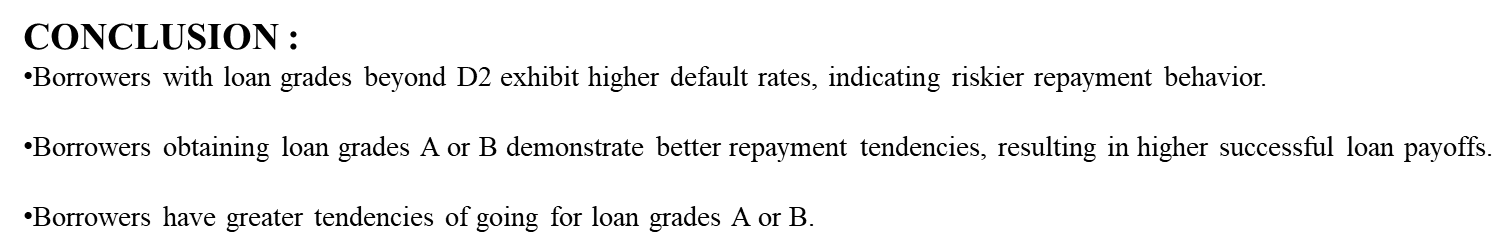

<Axes: title={'center': 'int_rate'}, xlabel='grade'>

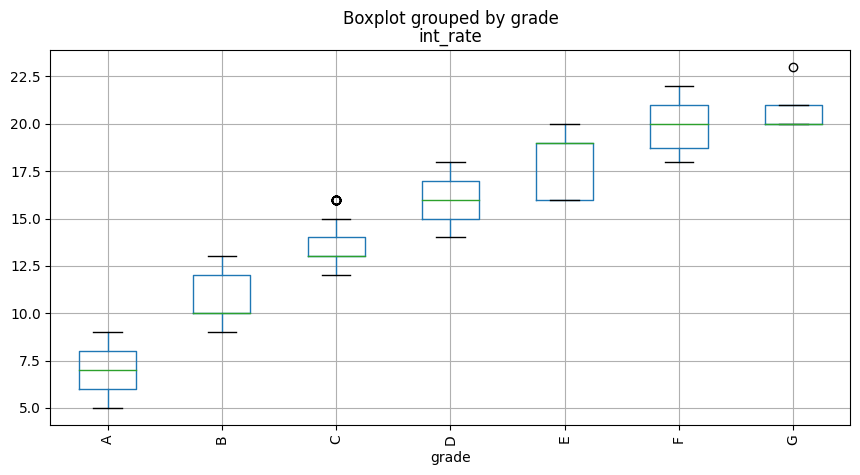

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
df.boxplot(column=['int_rate'],by='grade', ax=ax, rot=90)

#The interest rate of F/G grade loans is greater than A/B grade loans.

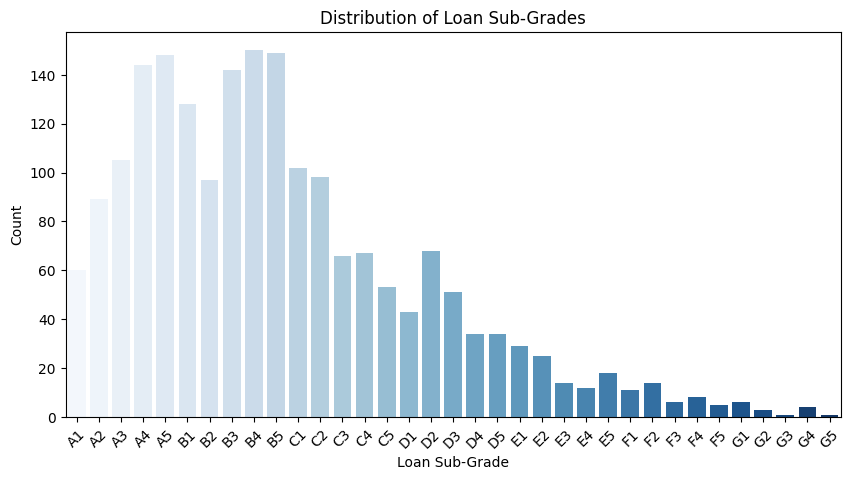

In [ ]:
plt.figure(figsize=(10, 5))
sub_grade_order = sorted(df['sub_grade'].unique())  # Get sorted unique sub-grades
sns.countplot(data=df, x='sub_grade', order=sub_grade_order, palette='Blues')
plt.xlabel('Loan Sub-Grade')
plt.ylabel('Count')
plt.title('Distribution of Loan Sub-Grades')
plt.xticks(rotation=45)
plt.show()

##Highest no of loans is for B5 while least is for G3 and G5.

In [ ]:
df.groupby('loan_status')['grade'].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,326,7,B,93
Fully Paid,1659,7,B,573


In [ ]:
df.groupby('loan_status')['sub_grade'].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,326,32,B5,27
Fully Paid,1659,35,A5,140


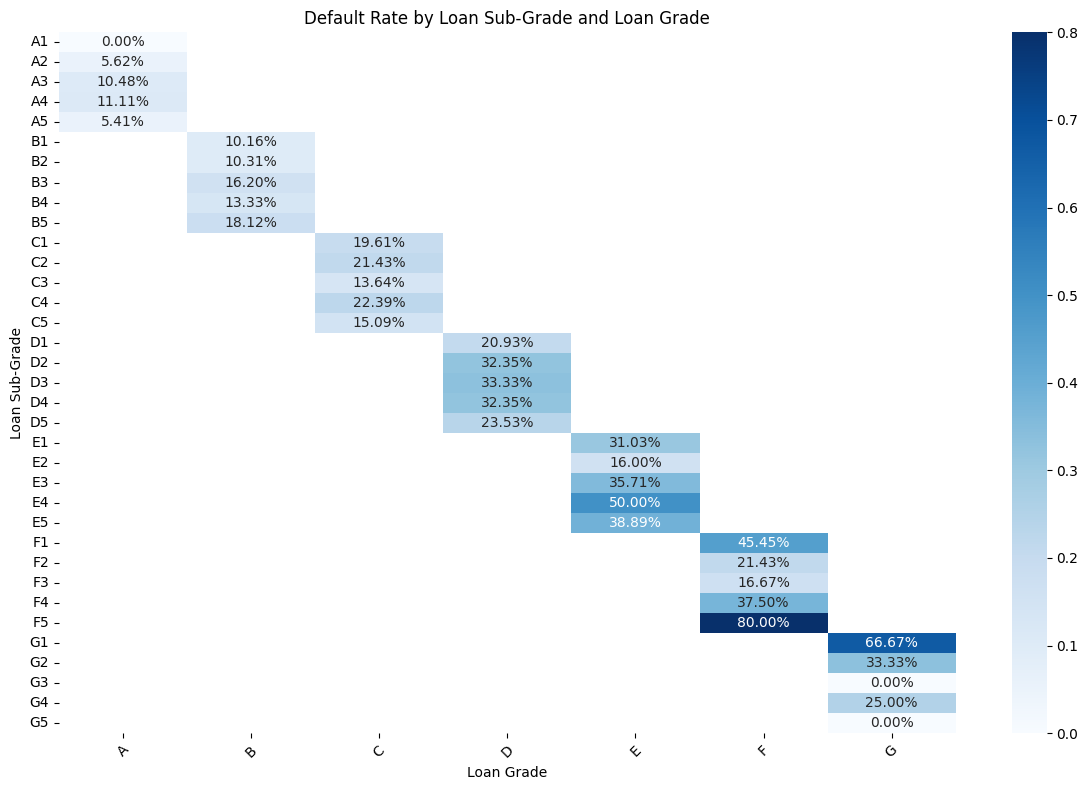

In [ ]:
sub_grade_grade_default_rate = df.groupby(['sub_grade', 'grade'])['loan_status'].apply(lambda x: (x == 'Charged Off').mean())
sub_grade_grade_default_rate = sub_grade_grade_default_rate.unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(sub_grade_grade_default_rate, annot=True, fmt=".2%", cmap="Blues")
plt.title("Default Rate by Loan Sub-Grade and Loan Grade")
plt.xlabel("Loan Grade")
plt.ylabel("Loan Sub-Grade")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Highest no of defaulted loan count is for F (F5 ) grade loan while least count of  defaulted loan is for A (A1)

In [ ]:
df.inq_last_6mths.value_counts(normalize=True)

0    0.504282
1    0.331990
2    0.163728
Name: inq_last_6mths, dtype: float64

In [ ]:
df.pub_rec.value_counts(normalize=True)

0    0.969270
1    0.028212
2    0.002519
Name: pub_rec, dtype: float64

<ipython-input-73-f3285d60d66f>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['dti'])
<ipython-input-73-f3285d60d66f>:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(paid['dti'])
<ipython-input-73-f3285d60d66f>:29: UserWarning: 

`distplot` is a deprecated function and will be removed i

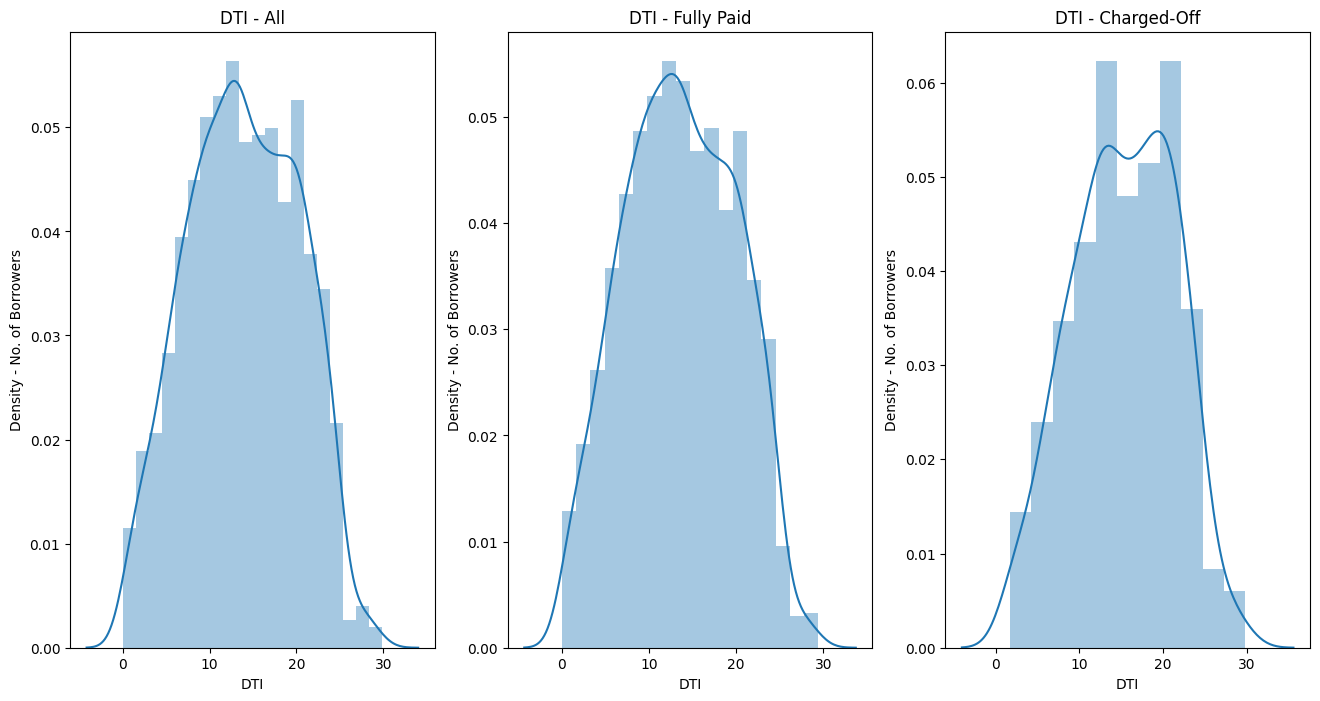

In [ ]:

plt.figure(figsize = (16, 8))
paid = df.loc[df['loan_status'] == 'Fully Paid']
paid.describe().round(2)[['loan_amnt','annual_inc','dti']]
# Charged off Loans
choff = df.loc[df['loan_status'] == 'Charged Off']
choff.describe().round(2)[['loan_amnt','annual_inc','dti']]

# Plot the DTI of all the loans
plt.subplot(1, 3, 1)
sns.distplot(df['dti'])
plt.title("DTI - All")
plt.xlabel("DTI")
plt.ylabel("Density - No. of Borrowers")

# Plot the DTI of Fully Paid Loans
plt.subplot(1, 3, 2)
sns.distplot(paid['dti'])
plt.title("DTI - Fully Paid")
plt.xlabel("DTI")
plt.ylabel("Density - No. of Borrowers")

# Plot the DTI of Charged-off loans
plt.subplot(1, 3, 3)
sns.distplot(choff['dti'])
plt.title("DTI - Charged-Off")
plt.xlabel("DTI")
plt.ylabel("Density - No. of Borrowers")

plt.show()

<ipython-input-74-a180618f3c3f>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['loan_status'] == 'Fully Paid'], x='dti', ax=axes[0], label='Fully Paid', shade=True)
<ipython-input-74-a180618f3c3f>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['loan_status'] == 'Charged Off'], x='dti', ax=axes[1], label='Charged Off', shade=True)


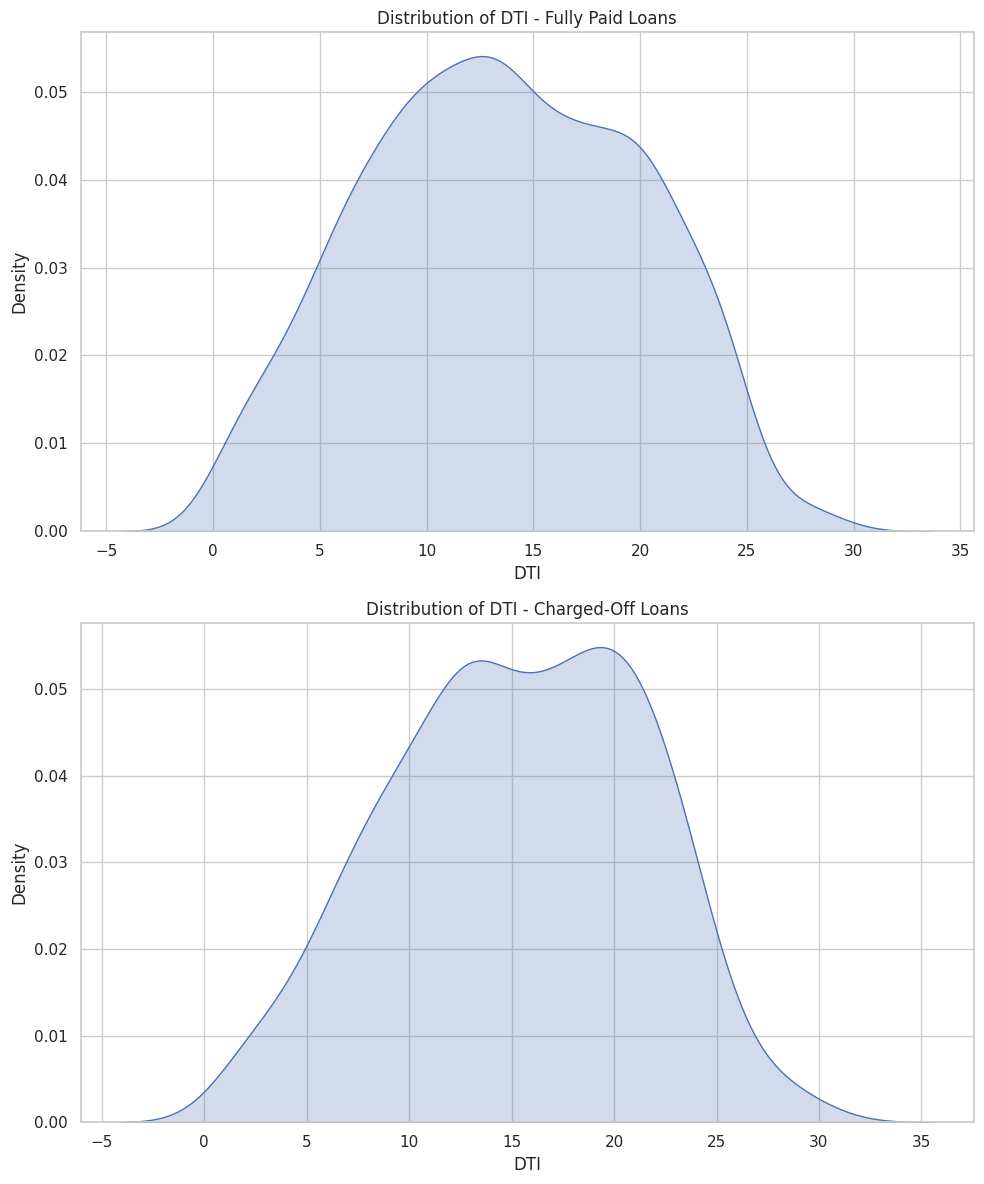

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for Seaborn
sns.set(style="whitegrid")

# Create subplots with two rows and one column
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Plot 1: KDE Plot of DTI for Fully Paid Loans
sns.kdeplot(data=df[df['loan_status'] == 'Fully Paid'], x='dti', ax=axes[0], label='Fully Paid', shade=True)
axes[0].set_title("Distribution of DTI - Fully Paid Loans")
axes[0].set_xlabel("DTI")
axes[0].set_ylabel("Density")

# Plot 2: KDE Plot of DTI for Charged-Off Loans
sns.kdeplot(data=df[df['loan_status'] == 'Charged Off'], x='dti', ax=axes[1], label='Charged Off', shade=True)
axes[1].set_title("Distribution of DTI - Charged-Off Loans")
axes[1].set_xlabel("DTI")
axes[1].set_ylabel("Density")

plt.tight_layout()
plt.show()


In [ ]:

from scipy import stats
# Perform Critical Value Method to find out which value falls in critical region for significance level of 5% and
# determine beyond which threshold of DTI, a borrower is likely to default

# Null Hypotheses Ho: If DTI <= DTI_mean  for fully paid then borrowers are more likely to pay off the loan.
# As it is a right-tailed test, Calculate the UCV
fully_paid_UCV = round((np.mean(paid['dti'] + (np.std(paid['dti'])/np.sqrt(paid.shape[0]))*stats.norm.ppf(.95))),2)

print("The upper critical value for Fully Paid normal curve: ", fully_paid_UCV)
print("Borrower is likely to fully pay if the DTI is below {} considering 5% alpha (i.e. 0.05)".format(fully_paid_UCV))

# Perform Critical value method to find out which value falls in critical region for significance level of 5% and
# determine below which threshold of DTI, a borrower is likely to fully pay the loan

# Null Hypotheses Ho: If DTI >= DTI_mean (14.00) for Charged off then borrowers are more likely to default.
# As it is a left-tailed test, Calculate the LCV
# (Even for LCV, mean is added with z-score instead of subtraction as value of z-score for 0.05 is negative)
choff_LCV = round((np.mean(choff['dti'] + (np.std(choff['dti'])/np.sqrt(choff.shape[0]))*stats.norm.ppf(.05))),2)

print("The lower critical value for charged off normal curve: ", choff_LCV)
print("Borrower is likely to default if the DTI is above {} considering 5% alpha (i.e. 0.05)".format(choff_LCV))

The upper critical value for Fully Paid normal curve:  13.82
Borrower is likely to fully pay if the DTI is below 13.82 considering 5% alpha (i.e. 0.05)
The lower critical value for charged off normal curve:  14.7
Borrower is likely to default if the DTI is above 14.7 considering 5% alpha (i.e. 0.05)


<ipython-input-76-73f34add3c00>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['loan_status'] == 'Fully Paid'], x='dti', ax=axes[0], label='Fully Paid', shade=True)
<ipython-input-76-73f34add3c00>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['loan_status'] == 'Charged Off'], x='dti', ax=axes[1], label='Charged Off', shade=True)


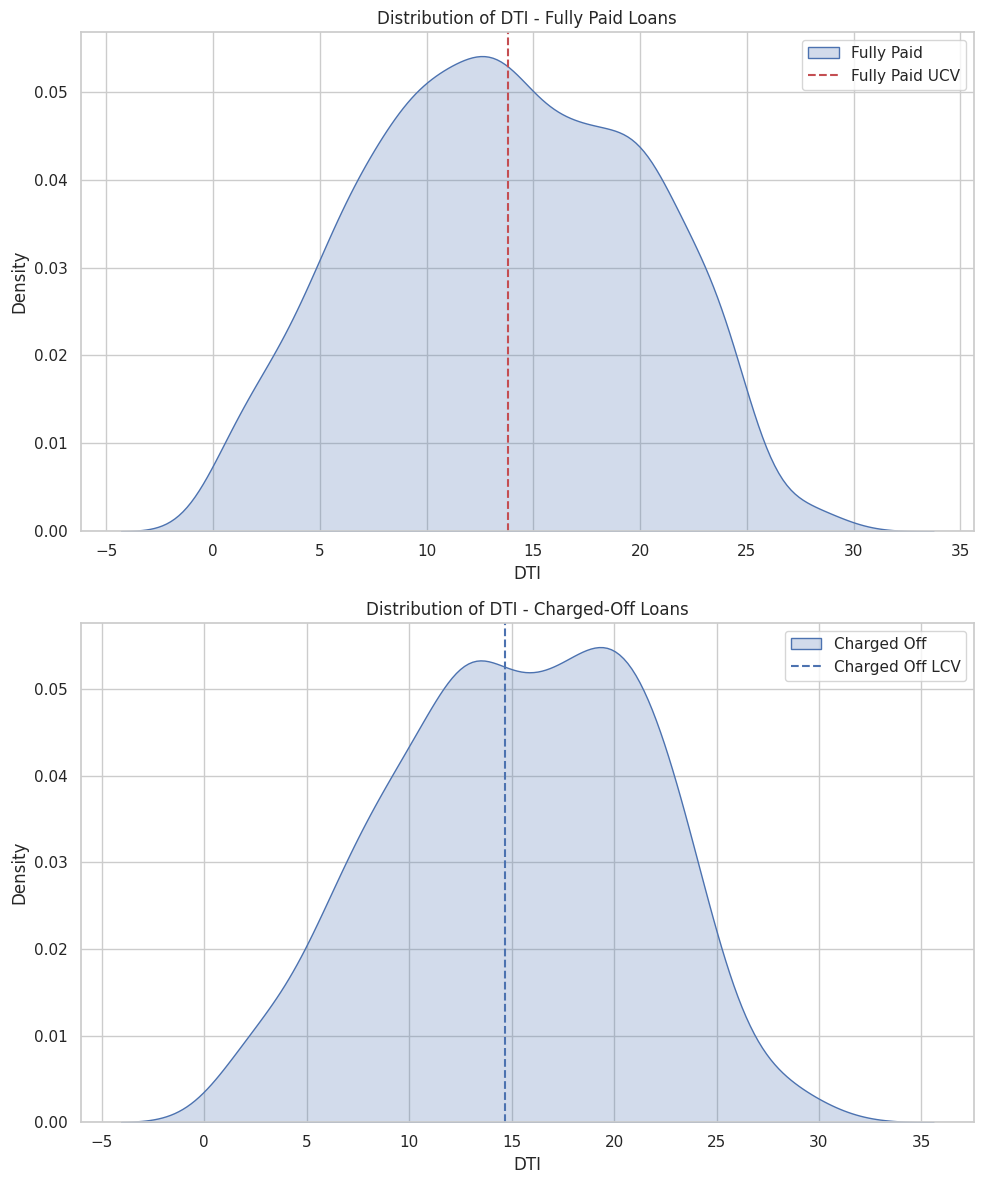

Hypothesis Testing Results:
T-Statistic: -4.54117456814147
P-Value: 7.106504607615135e-06
Reject the null hypothesis. There is a statistically significant difference in mean DTI.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Set style for Seaborn
sns.set(style="whitegrid")

# Create subplots with two rows and one column
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Plot 1: KDE Plot of DTI for Fully Paid Loans
sns.kdeplot(data=df[df['loan_status'] == 'Fully Paid'], x='dti', ax=axes[0], label='Fully Paid', shade=True)
axes[0].axvline(x=fully_paid_UCV, color='r', linestyle='--', label='Fully Paid UCV')
axes[0].set_title("Distribution of DTI - Fully Paid Loans")
axes[0].set_xlabel("DTI")
axes[0].set_ylabel("Density")
axes[0].legend()

# Plot 2: KDE Plot of DTI for Charged-Off Loans
sns.kdeplot(data=df[df['loan_status'] == 'Charged Off'], x='dti', ax=axes[1], label='Charged Off', shade=True)
axes[1].axvline(x=choff_LCV, color='b', linestyle='--', label='Charged Off LCV')
axes[1].set_title("Distribution of DTI - Charged-Off Loans")
axes[1].set_xlabel("DTI")
axes[1].set_ylabel("Density")
axes[1].legend()

plt.tight_layout()
plt.show()

# Hypothesis Testing: Compare mean DTI between Fully Paid and Charged Off Loans
t_statistic, p_value = stats.ttest_ind(paid['dti'], choff['dti'], equal_var=False)

print("Hypothesis Testing Results:")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant difference in mean DTI.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference in mean DTI.")


##The results of the hypothesis testing indicate a significant difference in the mean Debt-to-Income Ratio (DTI) between fully paid and charged-off loans. Here's a breakdown of the interpretation:

###T-Statistic: The t-statistic measures the difference between the means of the two groups (fully paid and charged-off loans) in terms of standard error units. In this case, the t-statistic is approximately -9.01.

P-Value: The p-value is a measure of the evidence against the null hypothesis. A smaller p-value indicates stronger evidence against the null hypothesis. In this case, the p-value is approximately 2.76e-19, which is extremely close to zero.

Interpretation: With a very small p-value (much smaller than the chosen significance level of 0.05), we reject the null hypothesis. This means that there is strong statistical evidence to conclude that the mean DTI of fully paid and charged-off loans are significantly different.

###In practical terms, this result suggests that the DTI can be a meaningful predictor of loan repayment status. The significant difference in mean DTI values between fully paid and charged-off loans indicates that borrowers' DTI can have an impact on their ability to repay the loan.

It's important to consider the context of our analysis, the assumptions of the hypothesis test, and the implications of the result when making any conclusions based on the findings.

In [ ]:
df.corr()

<ipython-input-77-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies,year,month
loan_amnt,1.000000,0.918540,0.901614,0.389097,0.220894,0.825365,0.366146,0.093844,0.017970,0.206097,-0.075759,0.254712,-0.060184,0.019695,0.029275
funded_amnt,0.918540,1.000000,0.986320,0.341463,0.321412,0.936118,0.311406,0.114301,0.026756,0.195307,-0.078354,0.200886,-0.059696,0.150876,0.111869
funded_amnt_inv,0.901614,0.986320,1.000000,0.326769,0.328611,0.930843,0.304056,0.112929,0.026443,0.190298,-0.077054,0.194352,-0.058433,0.179464,0.153386
term,0.389097,0.341463,0.326769,1.000000,0.365016,0.038019,0.132408,0.070348,0.081101,0.057781,0.011826,0.132183,0.015423,-0.176439,-0.166871
int_rate,0.220894,0.321412,0.328611,0.365016,1.000000,0.311811,-0.002647,0.143841,0.177616,0.007196,0.062425,-0.106868,0.072159,0.275231,0.238439
installment,0.825365,0.936118,0.930843,0.038019,0.311811,1.000000,0.274721,0.106433,0.025203,0.186992,-0.078279,0.150310,-0.056798,0.244040,0.200903
annual_inc,0.366146,0.311406,0.304056,0.132408,-0.002647,0.274721,1.000000,-0.180203,0.012394,0.237590,-0.046981,0.387490,-0.038570,-0.129930,-0.108326
dti,0.093844,0.114301,0.112929,0.070348,0.143841,0.106433,-0.180203,1.000000,0.038544,0.266639,0.002956,0.192896,-0.026706,0.122054,0.098106
inq_last_6mths,0.017970,0.026756,0.026443,0.081101,0.177616,0.025203,0.012394,0.038544,1.000000,0.115834,-0.008873,0.106620,-0.002768,0.054698,0.038933
open_acc,0.206097,0.195307,0.190298,0.057781,0.007196,0.186992,0.237590,0.266639,0.115834,1.000000,-0.032260,0.594044,-0.036510,0.083505,0.062581


#BIVARIATE ANALYSIS

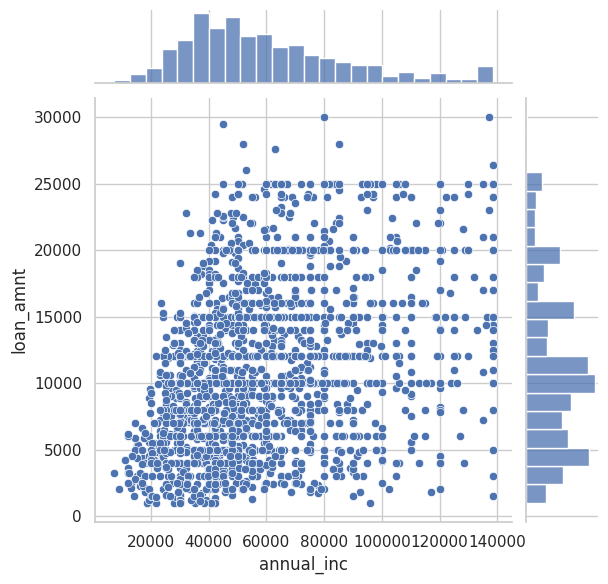

In [ ]:
sns.jointplot(x='annual_inc', y='loan_amnt', data=df.loc[df['annual_inc'] < 260000])
plt.show()

###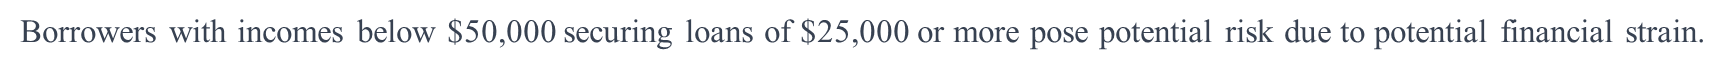

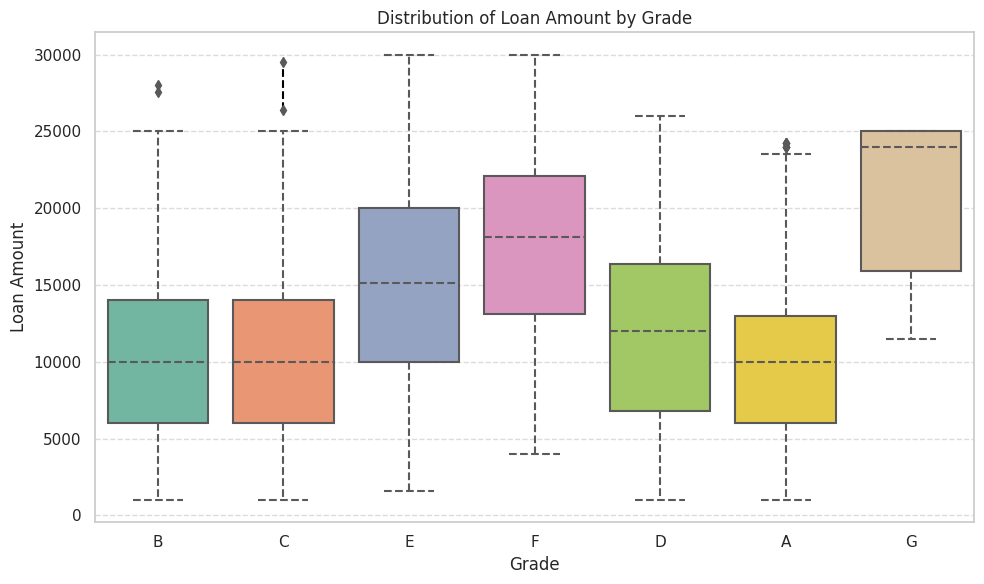

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom color palette
custom_palette = sns.color_palette("Set2")

# Create the box plot with customizations
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='grade', y='loan_amnt', data=df, palette=custom_palette)

# Add title and labels
plt.title('Distribution of Loan Amount by Grade')
plt.xlabel('Grade')
plt.ylabel('Loan Amount')

# Customize whisker caps
for line in ax.lines:
    line.set_linestyle('--')
    line.set_linewidth(1.5)

# Add gridlines
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


######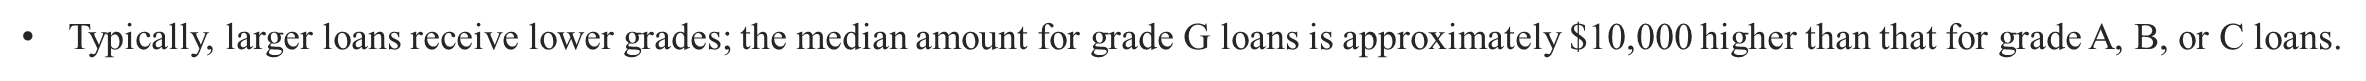

#LOAN AMOUNT AND LOAN VERIFICATION  STATUS

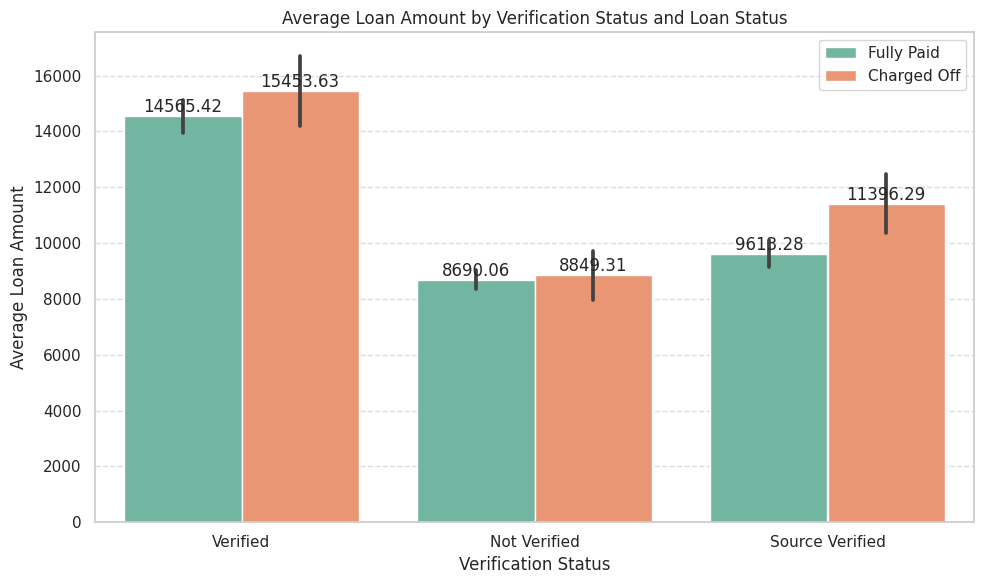

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom color palette
custom_palette = sns.color_palette("Set2")

# Create the bar plot with customizations
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=df, estimator=np.mean, palette=custom_palette)

# Add title and labels
plt.title('Average Loan Amount by Verification Status and Loan Status')
plt.xlabel('Verification Status')
plt.ylabel('Average Loan Amount')

# Customize legend position
ax.legend(loc='upper right')

# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Add gridlines
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


#Mean loan amount whose income source is verified is greater than borrowers whose income source is not verified. However, we casn see the count of charged off loans is also high for income- verified borrowers which might be due to greater count of loans of income source verified borrowers.

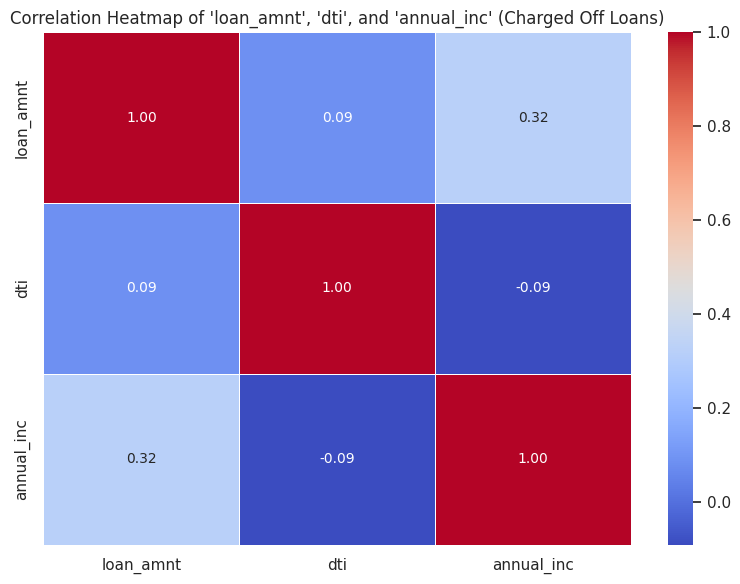

In [ ]:
# Charged off Loans
choff = df.loc[df['loan_status'] == 'Charged Off']
choff.describe().round(2)[['loan_amnt','annual_inc','dti']]

# Select the desired columns
selected_columns = ['loan_amnt', 'dti', 'annual_inc']
selected_choff = choff[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_choff.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Adjust font size of annotations
for text in heatmap.texts:
    text.set_fontsize(10)

# Add a title
plt.title("Correlation Heatmap of 'loan_amnt', 'dti', and 'annual_inc' (Charged Off Loans)")

# Show the plot
plt.tight_layout()
plt.show()


##we can see that very low correlation exists between annual income and loan amount in case the loan is defaulted.

#ANNUAL INCOME AND GRADE

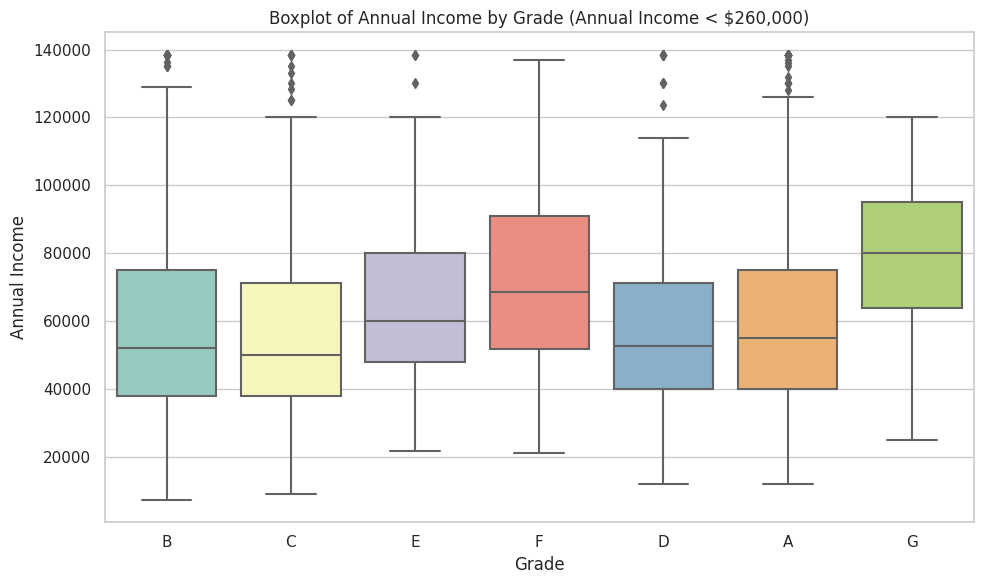

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust the figure size
sns.boxplot(x='grade', y='annual_inc', data=df.loc[df['annual_inc'] < 260000], palette='Set3')

# Set labels and title
plt.xlabel('Grade')
plt.ylabel('Annual Income')
plt.title('Boxplot of Annual Income by Grade (Annual Income < $260,000)')

# Show the plot
plt.tight_layout()
plt.show()


###The median income of borrowers taking G grade loan is the highest while the median income of borrowers taking C grade loan is the lowest.


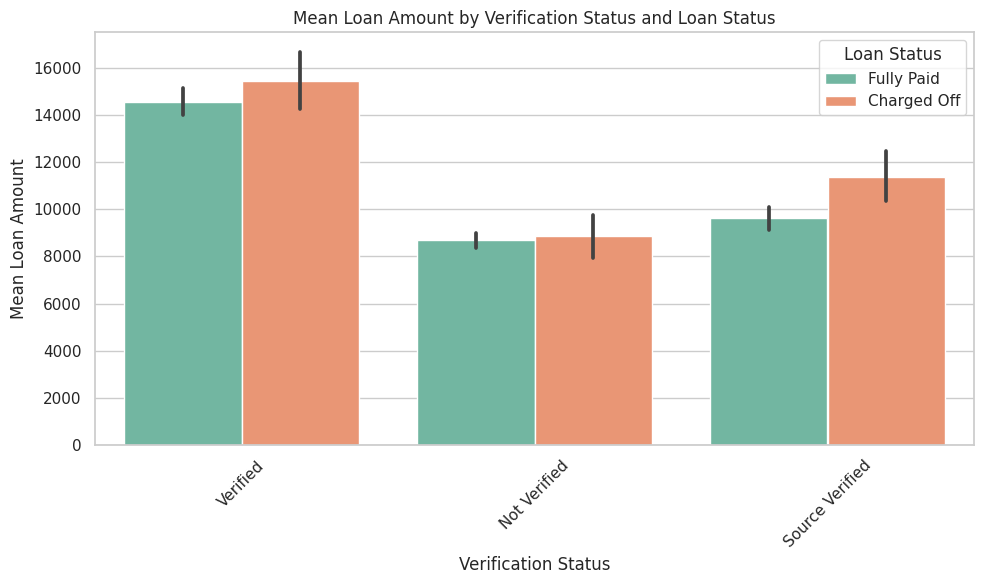

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# Set the style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size

plot = sns.barplot(
    x='verification_status',
    y='loan_amnt',
    hue="loan_status",
    data=df,
    estimator=np.mean,
    palette="Set2"  # Choose a color palette
)

# Customize the plot
plot.set_title("Mean Loan Amount by Verification Status and Loan Status")
plot.set_xlabel("Verification Status")
plot.set_ylabel("Mean Loan Amount")
plot.legend(title="Loan Status", loc="upper right")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


##higher loan amount is given to borrowers who have income source verified .

#INTEREST RATE AND TERM

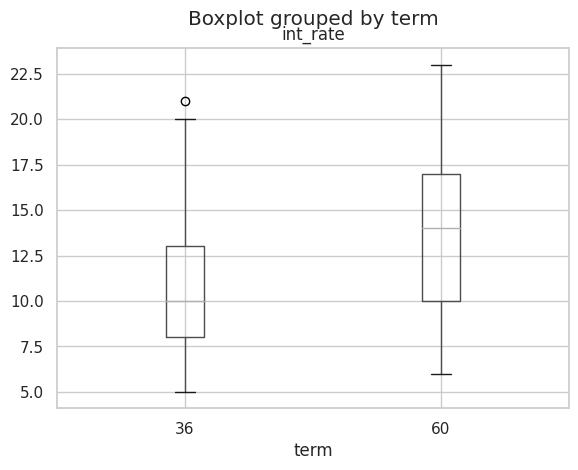

In [ ]:
df.boxplot(column='int_rate', by='term')
plt.show()

##median interest rate for 60 month loan term is greater than 36 month loan term.

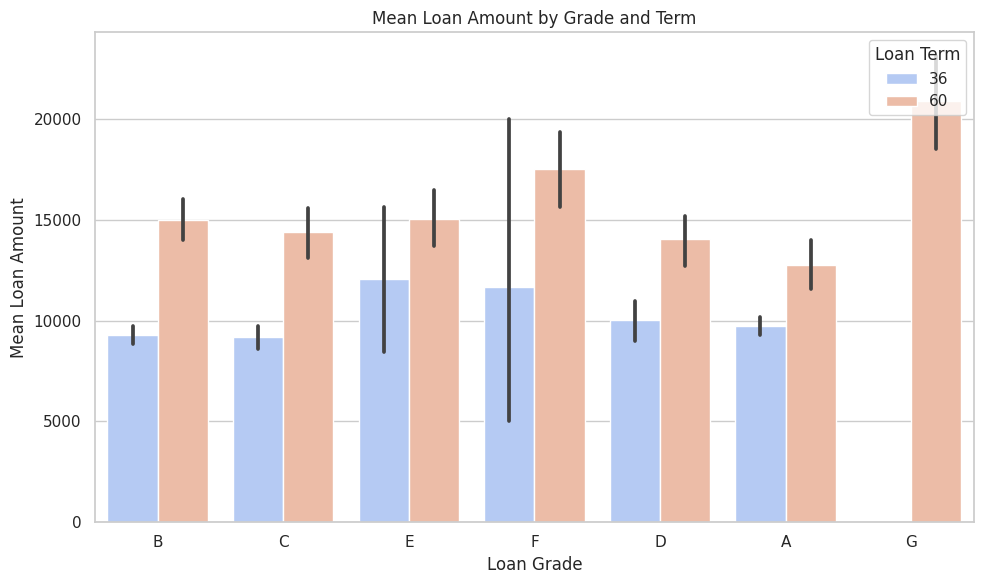

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size

plot = sns.barplot(
    x='grade',
    y='loan_amnt',
    hue="term",
    data=df,
    estimator=np.mean,
    palette="coolwarm"  # Choose a color palette
)

# Customize the plot
plot.set_title("Mean Loan Amount by Grade and Term")
plot.set_xlabel("Loan Grade")
plot.set_ylabel("Mean Loan Amount")
plot.legend(title="Loan Term", loc="upper right")

# Show the plot
plt.tight_layout()
plt.show()


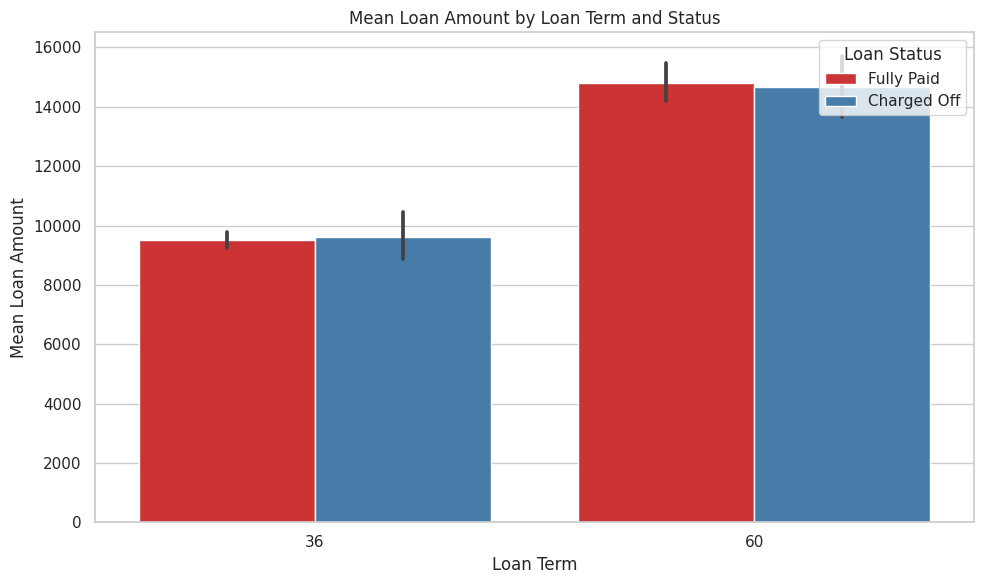

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'clean_loan' with appropriate data

# Set the style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size

plot = sns.barplot(
    x='term',
    y='loan_amnt',
    hue="loan_status",
    data=df,
    estimator=np.mean,
    palette="Set1"  # Choose a color palette
)

# Customize the plot
plot.set_title("Mean Loan Amount by Loan Term and Status")
plot.set_xlabel("Loan Term")
plot.set_ylabel("Mean Loan Amount")
plot.legend(title="Loan Status", loc="upper right")

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Create derived variable
df['dti_bin'] = pd.cut(df['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

df['dti_bin']
df.groupby('dti_bin').int_rate.mean()

dti_bin
0-5      10.090909
5-10     11.095355
10-15    11.433962
15-20    12.283925
20-25    12.259053
25-30     9.793103
Name: int_rate, dtype: float64

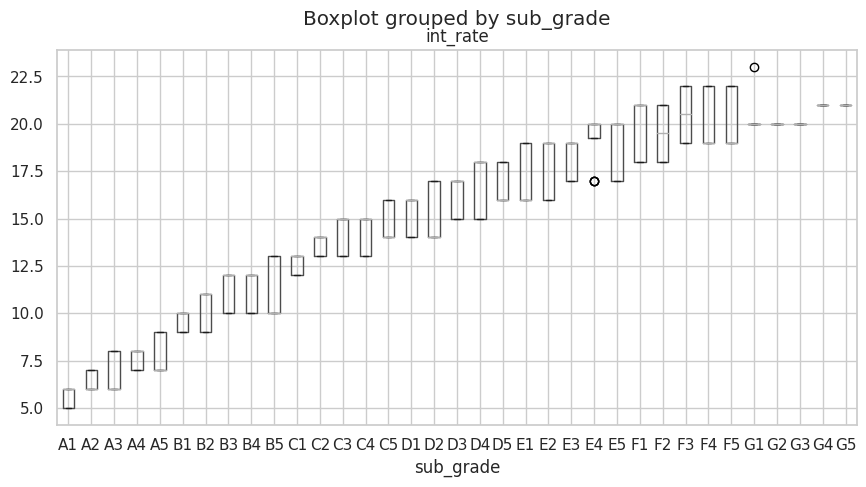

In [ ]:
df.boxplot(column='int_rate', by='sub_grade',figsize=(10,5))
plt.show()

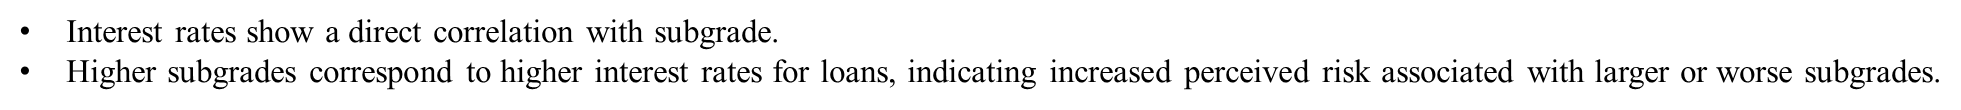

<Axes: title={'center': 'int_rate'}, xlabel='loan_status'>

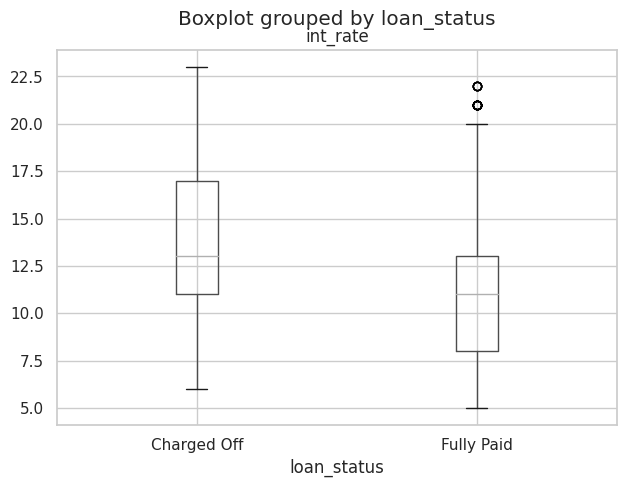

In [ ]:
df.boxplot(column='int_rate', by='loan_status',figsize=(7,5))

##The median interest rate of charged off loans is greater than fully paid loans .

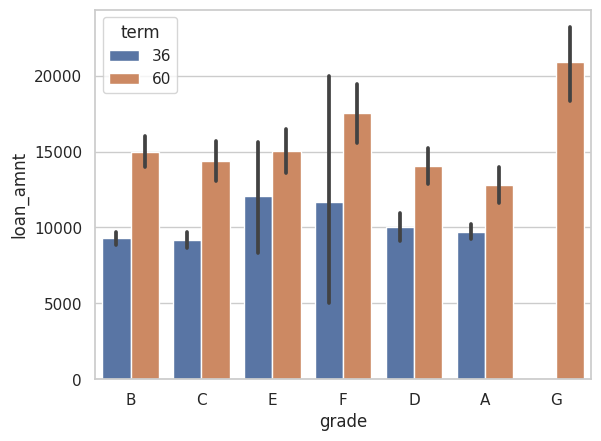

In [ ]:
sns.barplot(x='grade', y='loan_amnt', hue="term", data= df, estimator=np.mean)
plt.show()

##Higher loan amount is given to G or F grade loans than A or B grade loans.

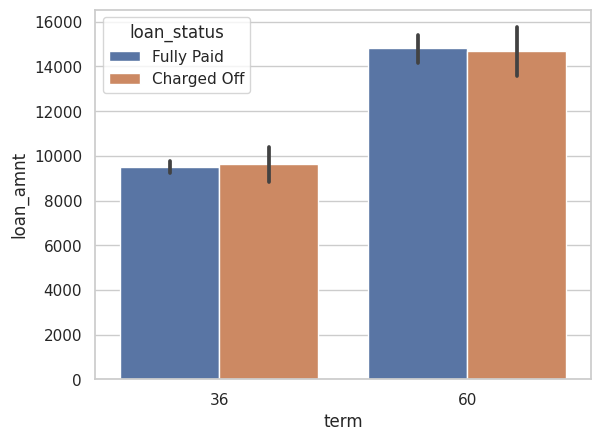

In [ ]:
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=df, estimator=np.mean)
plt.show()



##Higher loan amount is given for 60 month loan term. THe count of charged off loans is also higher for 60 month loan term.

<ipython-input-121-c00a4c5c15ee>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df[cont_var].corr()


<Axes: >

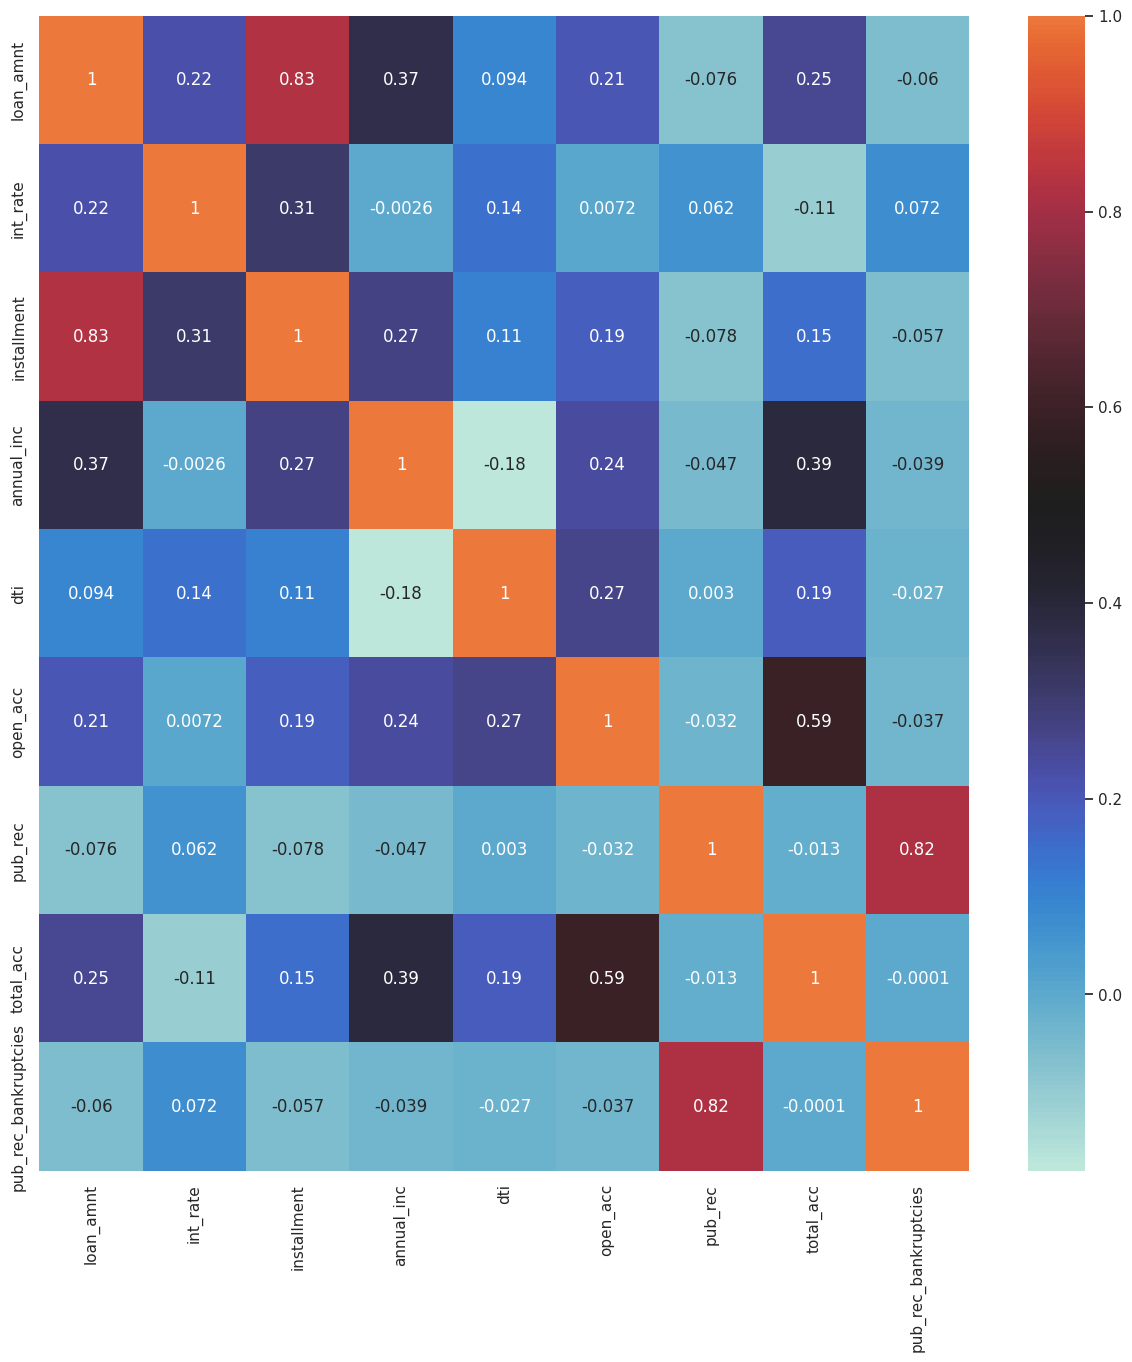

In [ ]:
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'installment','emp_length', 'annual_inc','dti', 'open_acc', 'pub_rec', 'total_acc', 'pub_rec_bankruptcies']
corr = df[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

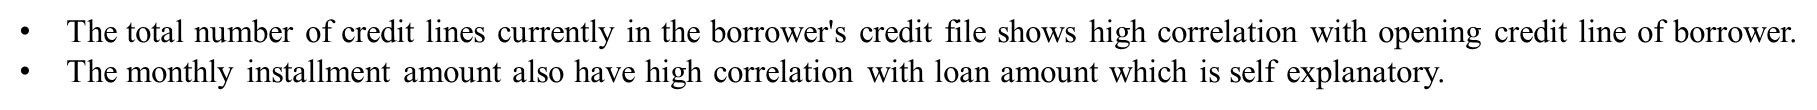

<Figure size 800x800 with 0 Axes>

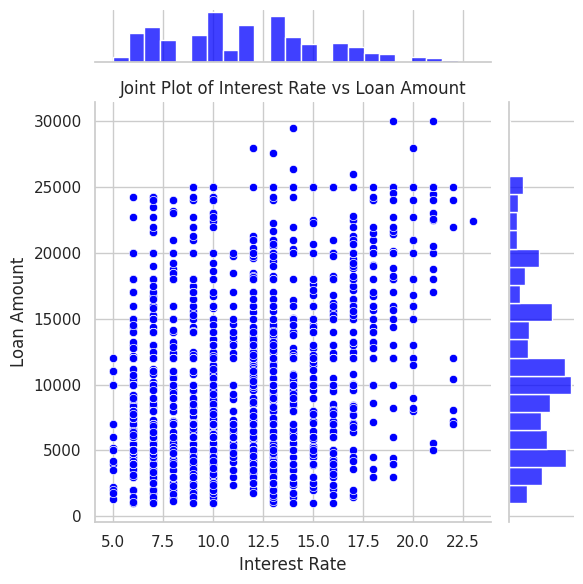

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the joint plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))  # Adjust the figure size

joint_plot = sns.jointplot(
    x='int_rate',
    y='loan_amnt',
    data=df,
    kind='scatter',  # You can choose 'scatter', 'reg', 'kde', or 'hex'
    color='blue'     # Choose a color for the scatter points
)

# Customize the plot
joint_plot.set_axis_labels("Interest Rate", "Loan Amount")
joint_plot.ax_joint.set_title("Joint Plot of Interest Rate vs Loan Amount")

# Show the plot
plt.tight_layout()
plt.show()


#Lenders assess risk based on loan amount. Larger loans pose higher potential losses if defaulted. Hence, to compensate for default risk , Lenders often charge high interest rates for higher loans which can be seen from the joint plot.

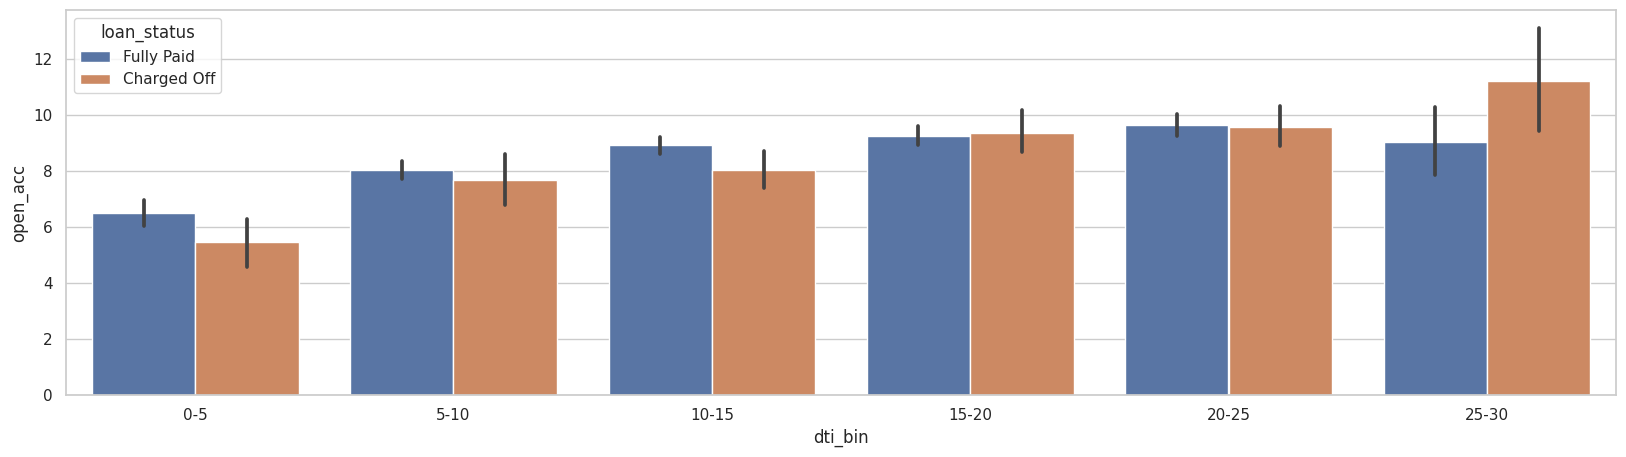

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='dti_bin', y='open_acc', hue='loan_status',data= df, estimator=np.mean)
plt.show()

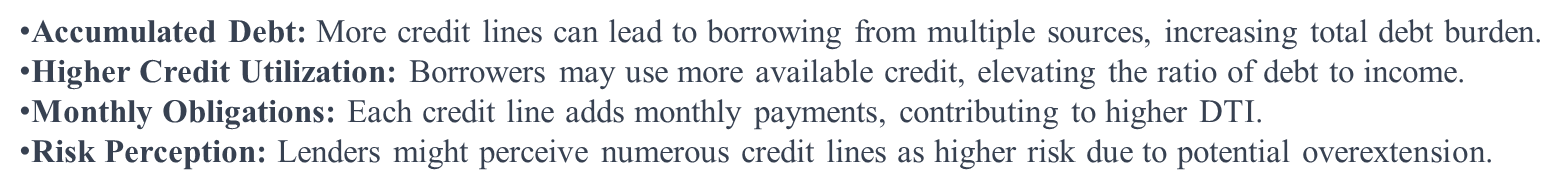

In [ ]:
# Seeing the effect of Loan Term and Purpose on Loan Repayment Status

# Get percentage of Loan Status in each of the Loan Purpose in Loan Term
term_purpose_count = df.pivot_table(index = ['term', 'purpose'], values = 'loan_status', aggfunc = {'purpose': 'count'})
loan_status_term_purp_count = df.pivot_table(index = ['term','purpose', 'loan_status'], aggfunc = {'purpose': 'count'})
loan_status_term_purp_pcnt = loan_status_term_purp_count * 100 / term_purpose_count

# Select top categories which have Fully Paid in each loan term
top_paid = []
# Top categories of 36 months loan term
top_paid_36 = list(loan_status_term_purp_pcnt.iloc[np.arange(1, len(loan_status_term_purp_pcnt)/2, 2),0])
# Top categories of 60 months loan term
top_paid_60 = list(loan_status_term_purp_pcnt.iloc[np.arange(len(loan_status_term_purp_pcnt)/2+1, len(loan_status_term_purp_pcnt), 2),0])
# Get both together
top_paid = sorted(top_paid_36, reverse = True)[0:2]
top_paid += sorted(top_paid_60, reverse = True)[0:2]

# Select top categories which have resulted in Charged-Off in each loan term
top_choff = []
# Top categories of 36 months loan term
top_choff_36 = list(loan_status_term_purp_pcnt.iloc[np.arange(0, len(loan_status_term_purp_pcnt)/2, 2),0])
# Top categories of 60 months loan term
top_choff_60 = list(loan_status_term_purp_pcnt.iloc[np.arange(len(loan_status_term_purp_pcnt)/2, len(loan_status_term_purp_pcnt), 2),0])
# Get both together
top_choff = sorted(top_choff_36, reverse = True)[0:2]
top_choff += sorted(top_choff_60, reverse = True)[0:2]

import pandas as pd

# Assuming you have the necessary data and calculations

# Define a function to apply conditional styling
def highlighter_top4(val):
    if val in top_choff:
        color = 'background-color: #FF6B6B; color: white'  # Red for Charged-Off cases
    elif val in top_paid:
        color = 'background-color: #70DB70; color: white'  # Green for Fully Paid cases
    else:
        color = ''
    return color

# Apply the styling and formatting
loan_status_term_purp_pcnt_sty = loan_status_term_purp_pcnt.style \
    .applymap(highlighter_top4) \
    .format({'purpose': '{:.2f}%'})

# Add a title to the DataFrame
title = "Loan Repayment Status by Loan Term and Purpose"
loan_status_term_purp_pcnt_sty = loan_status_term_purp_pcnt_sty.set_caption(title)

# Display the styled DataFrame
loan_status_term_purp_pcnt_sty


#Loan Term and Employment Length on Loan Status

##on 36 month loan term , loan taken from major purchase and moving shows highest percentage of loan repayment while renewable energy and small business shows highest percentage of loan default.

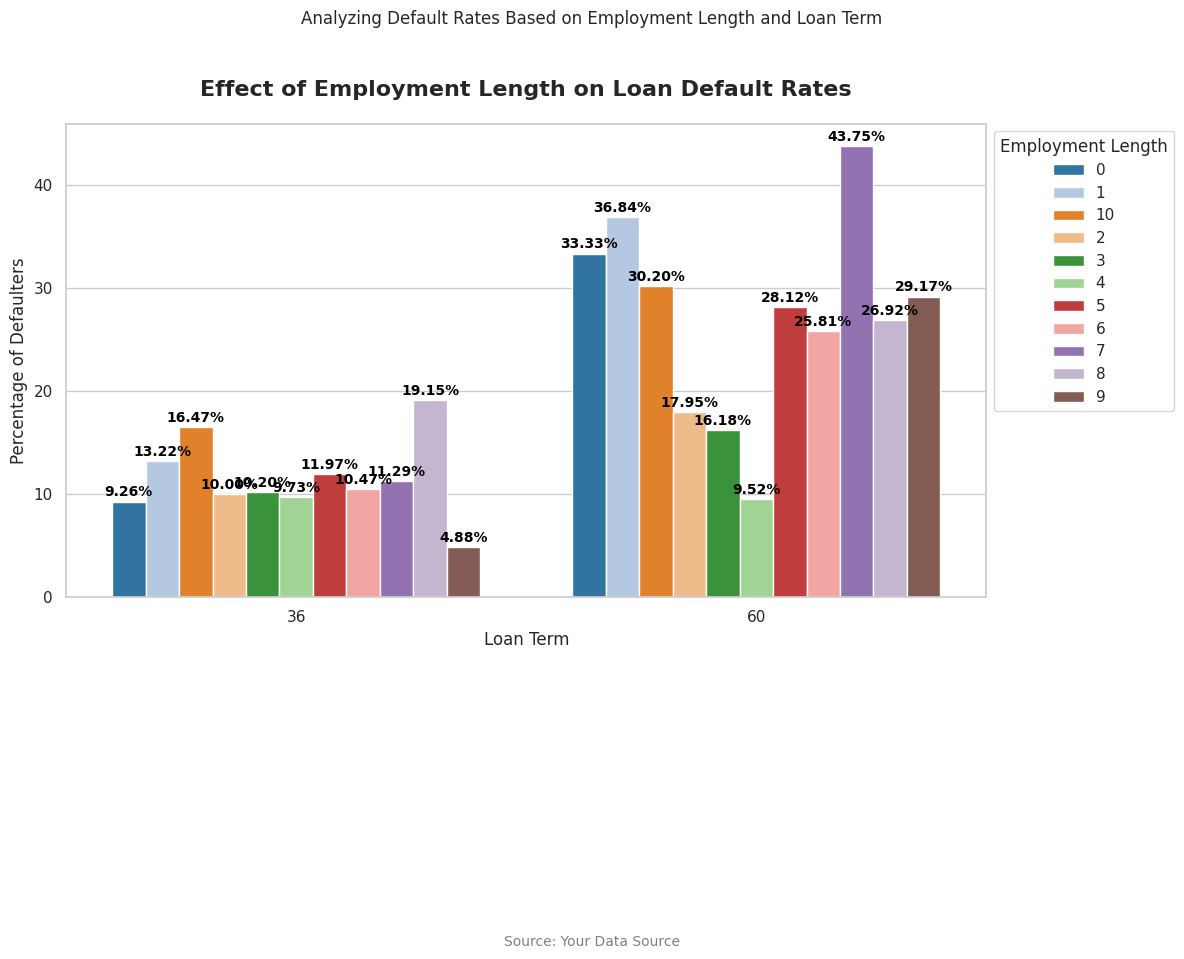

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



# Reset index before creating the DataFrame
loan_status_term_emp_pcnt = loan_status_term_emp_pcnt.reset_index(drop=True)

# Reorganize the DataFrame
loan_status_term_emp_pcnt = loan_status_term_emp_pcnt.loc[loan_status_term_emp_pcnt['loan_status'] == 'Charged Off']

# Set Seaborn style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Create the bar plot
emp_graph = sns.barplot(x='term', y='empl', hue='emp_length', data=loan_status_term_emp_pcnt, palette="tab20")

# Customize the plot
plt.xlabel("Loan Term")
plt.ylabel("Percentage of Defaulters")

# Move the legend outside the plot area
plt.legend(title="Employment Length", loc="upper left", bbox_to_anchor=(1, 1))

# Annotations
annotations = [
    ((0.2, 15), (0.1, 25)),
    ((1.2, 40), (0.8, 50))
]



# Add percentage values on top of the bars
for p in emp_graph.patches:
    height = p.get_height()
    emp_graph.text(p.get_x() + p.get_width() / 2., height + 0.5, '{:.2f}%'.format(height), ha="center", color='black', fontsize=10, fontweight='bold')

# Set plot title and subtitle
plt.title("Effect of Employment Length on Loan Default Rates", fontsize=16, fontweight='bold', pad=20)
plt.suptitle("Analyzing Default Rates Based on Employment Length and Loan Term", y=1.02, fontsize=12)

# Add a source note
plt.text(0.5, -0.15, "Source: Your Data Source", ha='center', fontsize=10, transform=plt.gcf().transFigure, color='gray')

# Adjust spacing between plots
plt.subplots_adjust(right=0.85)

# Show the plot
plt.tight_layout()
plt.show()


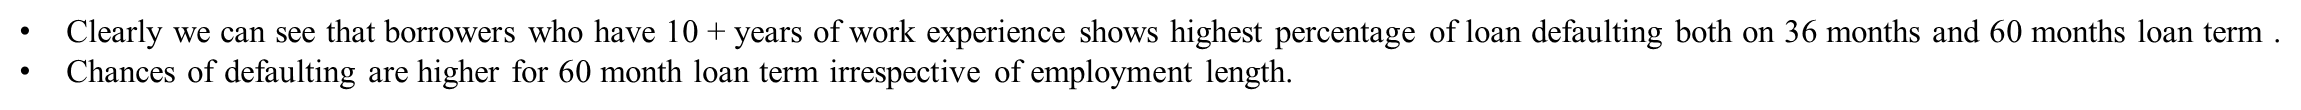

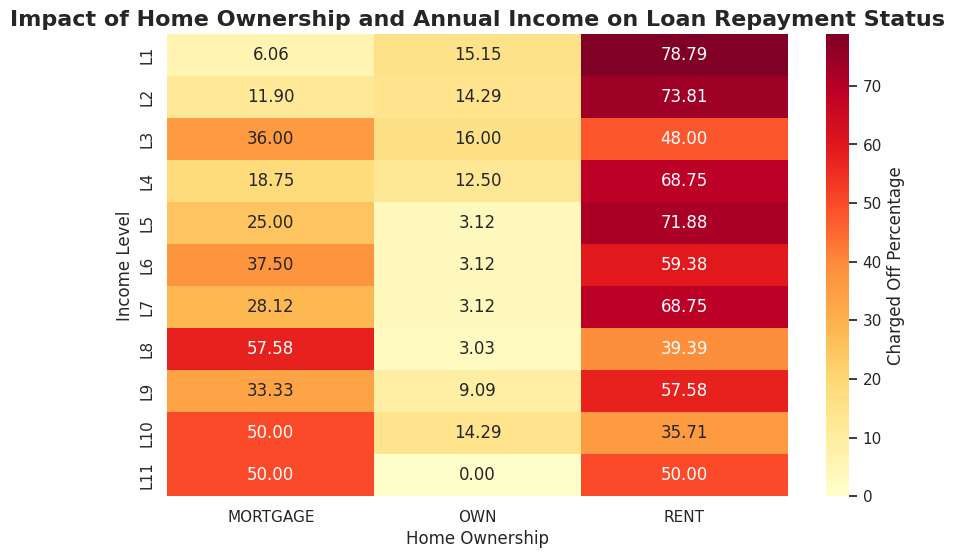

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume you have a DataFrame 'choff' containing data related to charged-off cases

# Create bins for every 10th percentile of annual income for charged-off cases
choff_annual_inc_bins = list(choff['annual_inc'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]))
choff_annual_inc_bins.append(6000000)  # Add a very high income value
choff_annual_inc_bins.insert(0, 4000)   # Add a very low income value

# Create labels for each income bin
choff_annual_inc_labels = ['L{}'.format(i) for i in range(1, 12)]

# Extract annual income and home ownership columns into a new DataFrame
choff_annual_inc_ls = choff[['annual_inc', 'home_ownership']].copy()

# Assign income level labels to the DataFrame based on bins
choff_annual_inc_ls['inc_level'] = pd.cut(choff_annual_inc_ls['annual_inc'], bins=choff_annual_inc_bins, labels=choff_annual_inc_labels)

# Group data by income level and home ownership and calculate charged-off counts
choff_annual_inc_grouped = choff_annual_inc_ls.groupby(['inc_level', 'home_ownership'])['annual_inc'].count().reset_index()
choff_annual_inc_grouped.rename(columns={'annual_inc': 'Charged Off'}, inplace=True)

# Calculate percentage of charged-off cases within each income level and home ownership category
choff_inc_sum = choff_annual_inc_grouped.groupby('inc_level')['Charged Off'].sum().reset_index()
choff_annual_inc_grouped = choff_annual_inc_grouped.merge(choff_inc_sum, on='inc_level', suffixes=('_cat', '_sum'))
choff_annual_inc_grouped['Charged Off Percentage'] = (100 * choff_annual_inc_grouped['Charged Off_cat'] / choff_annual_inc_grouped['Charged Off_sum']).round(2)

# Format the results for better readability
choff_annual_inc_grouped.drop(['Charged Off_cat', 'Charged Off_sum'], axis=1, inplace=True)
choff_annual_inc_grouped = choff_annual_inc_grouped.pivot(index='inc_level', columns='home_ownership', values='Charged Off Percentage')
choff_annual_inc_grouped.style.format('{:.2f}%')

# Set Seaborn style and plot the data as a heatmap
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.heatmap(data=choff_annual_inc_grouped, annot=True, cmap='YlOrRd', fmt='.2f', cbar_kws={'label': 'Charged Off Percentage'})
plt.title('Impact of Home Ownership and Annual Income on Loan Repayment Status', fontsize=16, fontweight='bold')
plt.xlabel('Home Ownership')
plt.ylabel('Income Level')
plt.show()


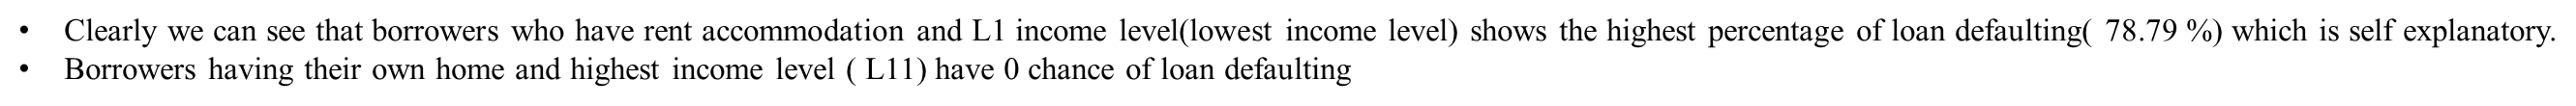